## <span style='color:dimgray'><center>'2022년도 JB금융지주 데이터 분석 경진대회 - **JB8** 김용갑 박창용 김덕은</center></span>
# <center>***온라인 커머스 상품 재구매 예측 모형 개발***</center>
## <span style='color:dimgray'><center> 《2022년 10월》 </center></span>

### <span style='color:dimgray'> **§ Table of Contents**</span>

[**Ⅰ. Abstract**](#Abstract)  
[**Ⅱ. Introduction**](#Introduction)  
1. [Required packages import](#Required)  
2. [Data import](#Data)  
    2.1 [Data description](#des)  
    2.2 [Data preprocessing](#des2) 
3. [Exploratory data analysis](#Exploratory)  
    3.1 [Customer's](#1)     
    3.2 [Products's](#2)  
    3.3 [Network analysis](#3)  
    3.4 [Cluster analysis](#4)  
    
[**Ⅲ. Methods**](#Methods)  
1. [Data](#Data2)  
    1.1 [Predictors](#pre)  
    1.2 [Data Merge](#dataset)  
    1.3 [Train & Test data](#dataset2)   
2. [Model development](#Modeling)  
    2.1 [F1 score](#F1)  
    2.2 [Class Imbalance problem](#im)  
    2.3 [Random Forest](#s1)  
    2.4 [XGboosting](#s2)  
    2.5 [Gradient boosting](#s3)  
    2.6 [Voting Classifier](#s4)  
    2.7 [New prediction](#s5)  
3. [Test model](#Model)  
    3.1 [Prediction](#pred)  
    
[**Ⅳ. Results**](#Results)  


-------------------------

## Ⅰ. **Abstract <a class='anchor' id="Abstract">**

> <span style='font-size:15px ; line-height:2.0'>    
&nbsp;본 과제에서 저희 팀은 <b>온라인 커머스 상품의 구매 이력</b>을 토대로 <b>고객이 재구매할 만한 상품을 제안하는 것</b>을 목표로 분석을 진행하였습니다.<br>  
&nbsp;첫 번째로, 고객별 상품 제안을 위해 <b>고객별 특성을 분석</b>하고, <b>함께 구매한 상품간의 관계를 파악</b>하였습니다. 고객 주문별 함께 구매된 상품 정보를 이용하여 <b>Network analysis</b>를 수행하였고, <b>함께 구매하는 상품의 비중</b>을 알 수 있었습니다. <b>Organic</b> 상품들의 <b>co-purchase가 높았고</b>, 이 정보는 <b>고객군을 나누는데에도 활용</b>되었습니다.<br>  
&nbsp;두 번째로, <b>고객별 구매한 상품군의 개수</b>와 <b>구매 요일</b>, <b>유기농 상품 구매 비율</b> 등의 정보를 기반으로 <b>K-means cluster analysis</b>를 수행하여 고객을 <b>두 개의 Cluster</b>로 구분하였습니다. Optimal cluster의 개수는 <b>cluster stability</b>가 가장 높은 <b>k (k=2)</b> 값을 선정하였고, <b>Cluster analysis의 결과는 최근 구매한 상품들의 구매 순서를 추정하는데 활용</b>하였습니다.<br>  
<br>  
&nbsp;다음으로, 저희 팀은 <b>온라인 커머스 고객별 구매 이력</b>과 <b>현재 구매 정보</b>를 활용하여 <b>과거 구매 했던 상품의 재구매 여부</b>를 예측하는 ML 모형을 개발하였습니다.<br>  
<b>과거 구매 이력 정보</b>를 이용해 고객, 상품, 고객 & 상품 관점에서 설명변수를 생성하였고 Train data를 고객 기준으로 7:3으로 나누어 모형의 성능 평가에 사용할 <b>Validation data</b>를 구성하였습니다.<br>  
<b>예측모형</b>은 Tree-based 모형인 <b>1) Random Forest, 2) XGboost, 3) Gradient Boost 방법론</b>을 이용하였으며, <b>3개의 예측 모형의 결과를 결합</b>하여 <b>Soft voting classifier</b>를 개발하였습니다.<br>  
class의 비중이 불균형하여 결과에 편향이 생기는 것을 방지하기 위해 모형 개발 과정에서 <b>class-weight</b>를 고려하였습니다. <b>Hyperparameter tuning</b>은 <b>5-folds cross-validation</b>을 통해 진행하였습니다.<br>  
<b>최종 모형</b>을 <b>validation data</b>에 적용하여 성능을 평가할 때는 <b>F1 score</b>을 기준으로 하였으며, <b>고객별 F1 score의 평균값이 최대</b>가 되도록 확률값의 <b>threshold</b>를 구하였습니다.<br>  
<b>예측 모형을 통해 고객마다 과거 구매 상품을 재구매하는 것을 예측</b>할 수 있지만,<br>  
&nbsp;&nbsp;&nbsp; <b>1)  최근 구매 중 특정 상품이 장바구니에 몇번째로 담겼는가?</b><br>  
&nbsp;&nbsp;&nbsp; <b>2)  과거에 구매하지 않았지만 현재 구매한 새로운 상품은 무엇인가?</b><br>  
의 답을 알 수 없기 때문에 저희 조는 <b>모형</b>을 통해 예측한 상품리스트의 특징을 토대로 이를 추정하였습니다.  
</span>  

-------------------------

## Ⅱ. **Introduction<a class='anchor' id="Introduction">**

><span style='font-size:15px ; line-height:2.0'>   
&nbsp;&nbsp;최근 <b>과거 고객의 상품 구매 이력</b>을 통해 소비 패턴을 발견하고, <b>미래 소비를 예측</b>하고자 하는 시도는 산업 전반에서 이루어지고 있습니다.  대표적으로 구글, Youtube, 넷플렉스와 같은 기업들이 고객의 소비/행동 패턴을 예측하여 개인화된 제안 시스템을 토대로 큰 성공을 거두었고, 국내에서도 많은 기업들이 이 분야에 관심을 가지고 있습니다.  국내 금융 시장에서는 22년부터 <b>마이데이터 산업</b>이 본격화되며 시중 은행 뿐만 아니라 마이데이터 사업 본허가를 취득한 11번가와 같은 E-commerce 기업이 다양한 <b>초개인화 서비스</b> 개발을 추진하고 있습니다.<br> 
<br> 
&nbsp;&nbsp;본 과제에서 저희 팀은 온라인 커머스에서 <b>과거 고객의 구매 이력</b>을 바탕으로 <b>재구매할 상품을 예측, 제안</b>하는 알고리즘을 개발하는 것을 목표로 분석을 진행하였습니다.  저희 팀의 분석은 <b>Introduction, Methods, Results</b> 순서로 이루어져 있으며 <b>Introduction</b>에서는 분석에 사용할 데이터 소개와 데이터 전처리와 함께 <b>EDA(Exploratory data analysis)</b>를 수행하였습니다.  고객과 상품 관점에서 EDA를 수행하였고, 상품에 대한 <b>co-purchase network</b>와 고객에 대한 <b>cluster analysis</b>를 수행하였습니다.  <b>Methods</b>에서는 모형 개발에 사용 될 <b>변수 생성</b> 및 <b>Random Forest,  XGboost, Gradient boost 예측 모형 개발 및 성능 검증</b>을 진행하였습니다.  끝으로 <b>Result</b>에서는 전체적으로 분석 결과를 요약하였습니다.<br> 
</span> 

### **1. Required packages import**<a class='anchor' id="Required">

In [3]:
%%time

from jbfg.pandas_utils import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.ticker as mticker 
import networkx as nx
import random
from plotly import express as px
from sklearn.base import clone
from sklearn.utils import check_random_state
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import plotly.express as px

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import axes3d

import warnings 
warnings.filterwarnings('ignore')

CPU times: user 2.37 s, sys: 144 ms, total: 2.52 s
Wall time: 2.53 s


- Graph font 설정 : 나눔고딕체 / 크기 15 / 마이너스 깨짐 방지

In [2]:
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 15, 15
plt.rc('axes',unicode_minus=False)

- Database 설정

In [3]:
schema = 'l2_jbbk_extnl' 

### **2. Data import<a class='anchor' id="Data">**

In [4]:
sql = 'select * from products_info'
sql2 = 'select * from train_x_past'
sql3 = 'select * from train_x_current'
sql4 = 'select * from train_y'
sql5 = 'select * from test_x_past'
sql6 = 'select * from test_x_current'

In [5]:
%%time
products_info = get_df(sql, schema)
train_x_past = get_df(sql2, schema)
train_x_current = get_df(sql3, schema)
train_y = get_df(sql4, schema)
test_x_past = get_df(sql5, schema)
test_x_current = get_df(sql6, schema)

CPU times: user 19.2 s, sys: 1.28 s, total: 20.5 s
Wall time: 18.9 s


#### **2.1 Dataset description<a class='anchor' id="des">**  
    
 
> 2.1절에서는 분석에 사용할 dataset의 특성 (dimension, data type, missing value 등)을 살펴보았습니다.  


- **Products_info** : 100개 상품에 대한 정보  
  **Train_x_past** : 5,859명 고객들의 과거 구매 이력  
   **Train_x_current** : 상품 ID를 제외한 5,859명 고객들의 현재 구매 정보  
   **Train_y** : 5,859명 고객들의 현재 주문 정보에 대한 상품 ID  
   **Test_x_past** : 4,141명 고객들의 과거 구매 이력  
   **Test_x_current** : 상품ID를 제외한 4,144명 고객들의 현재 구매 정보

+ Dataset dimension

In [6]:
print(f""" products_info : {products_info.shape} \n train_x_past : {train_x_past.shape} \n train_x_current : {train_x_current.shape} \n train_y : {train_y.shape} \n test_x_past : {test_x_past.shape} \n test_x_current : {test_x_current.shape} """)

 products_info : (100, 6) 
 train_x_past : (1253972, 9) 
 train_x_current : (24424, 8) 
 train_y : (24424, 1) 
 test_x_past : (541922, 9) 
 test_x_current : (16126, 8) 


- **Products_info** : 상품정보 [상품ID, 상품명, 분류 ID, 담당부서 ID, 분류명, 담당부서명]

In [7]:
products_info.tail()

,product_id,name,category_id,division_id,category_name,division_name
95,47209,Organic Hass Avocado,24,4,fresh fruits,produce
96,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
97,21137,Organic Strawberries,24,4,fresh fruits,produce
98,13176,Bag of Organic Bananas,24,4,fresh fruits,produce
99,24852,Banana,24,4,fresh fruits,produce


In [8]:
le = LabelEncoder() 

In [9]:
products_info['new_pd_index'] = le.fit_transform(products_info['product_id']) + 1 

In [10]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     100 non-null    object
 1   name           100 non-null    object
 2   category_id    100 non-null    object
 3   division_id    100 non-null    object
 4   category_name  100 non-null    object
 5   division_name  100 non-null    object
 6   new_pd_index   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [11]:
print('Number of missing values : ',products_info.isnull().values.sum())

Number of missing values :  0


- **Train_x_past** : 5,859명 고객의 과거 구매 이력 [주문 ID, 고객 ID, 고객별 주문순서, 구매요일, 구매시각, 직전 구매 후 경과일수, 주문서 내 담긴 상품의 순번, 재구매여부, 상품 ID]

In [12]:
train_x_past.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
1253967,1902783,163819,47,0,19,13.0,2,1,24852
1253968,1969590,163819,42,1,15,6.0,3,1,24852
1253969,2549215,163819,9,1,11,7.0,1,1,24852
1253970,3103211,163819,39,1,14,7.0,3,1,24852
1253971,3207262,163819,8,1,12,7.0,1,1,24852


In [13]:
train_x_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253972 entries, 0 to 1253971
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   order_id        1253972 non-null  object
 1   cstno           1253972 non-null  object
 2   order_number    1253972 non-null  object
 3   week_day        1253972 non-null  object
 4   order_hour      1253972 non-null  object
 5   order_interval  1253972 non-null  object
 6   add_order       1253972 non-null  object
 7   is_reordered    1253972 non-null  object
 8   product_id      1253972 non-null  object
dtypes: object(9)
memory usage: 86.1+ MB


In [14]:
train_x_past['order_number'] = train_x_past['order_number'].astype('int')
train_x_past['add_order'] = train_x_past['add_order'].astype('int')
train_x_past['week_day'] = train_x_past['week_day'].astype('int')
train_x_past['order_hour'] = train_x_past['order_hour'].astype('int')
train_x_past['order_interval'] = pd.to_numeric(train_x_past['order_interval'])

In [15]:
print('Number of missing values : ',train_x_past.isnull().values.sum())

Number of missing values :  21686


In [16]:
train_x_past.isna().sum(axis=0)

order_id              0
cstno                 0
order_number          0
week_day              0
order_hour            0
order_interval    21686
add_order             0
is_reordered          0
product_id            0
dtype: int64

In [17]:
train_x_past.loc[train_x_past.order_interval.isna()==True].order_number.value_counts()

1    21686
Name: order_number, dtype: int64

: order_interval이 NA인 것은 첫 구매건에 의한 것으로 0으로 채워주었습니다.    

In [18]:
train_x_past.fillna(0,inplace=True)

In [19]:
train_x_past.isna().sum(axis=0)

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
dtype: int64

- **Train_x_current** : 5,859명 고객들의 최근 주문 번호 [주문 ID, 고객 ID, 고객별 주문순서, 구매요일, 구매시각, 직전 구매 후 경과일수, 주문서 내 담긴 상품의 순번, 재구매여부]

In [20]:
train_x_current.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
24419,3184000,174046,100,5,7,2.0,12,1
24420,1754722,6710,100,5,11,3.0,21,1
24421,1076973,150840,100,0,13,0.0,18,1
24422,1247049,99707,100,1,13,3.0,6,1
24423,1775787,201038,100,5,9,2.0,1,1


In [21]:
train_x_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24424 entries, 0 to 24423
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        24424 non-null  object
 1   cstno           24424 non-null  object
 2   order_number    24424 non-null  object
 3   week_day        24424 non-null  object
 4   order_hour      24424 non-null  object
 5   order_interval  24424 non-null  object
 6   add_order       24424 non-null  object
 7   is_reordered    24424 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [22]:
train_x_current['order_number'] = train_x_current['order_number'].astype('int')
train_x_current['add_order'] = train_x_current['add_order'].astype('int')
train_x_current['week_day'] = train_x_current['week_day'].astype('int')
train_x_current['order_hour'] = train_x_current['order_hour'].astype('int')
train_x_current['order_interval'] = pd.to_numeric(train_x_current['order_interval'])

In [23]:
print('Number of missing values : ',train_x_current.isnull().values.sum())

Number of missing values :  0


- **train_y** : 5,859명 고객들의 최근 주문 상품 (train_x_current의 각 열에 매칭되는 상품 정보)

In [24]:
train_y.tail()

,product_id
24419,24852
24420,24852
24421,24852
24422,24852
24423,24852


In [25]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24424 entries, 0 to 24423
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  24424 non-null  object
dtypes: object(1)
memory usage: 190.9+ KB


In [26]:
print('Number of missing values : ',train_y.isnull().values.sum())

Number of missing values :  0


- **test_x_past** : 4,141명 고객들의 과거 구매 이력 [주문 ID, 고객 ID, 고객별 주문순서, 구매요일, 구매시각, 직전 구매 후 경과일수, 주문서 내 담긴 상품의 순번, 재구매여부, 상품 ID]

In [27]:
test_x_past.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
541917,2672845,119134,39,1,14,17.0,4,1,24852
541918,2731678,119134,38,5,14,3.0,4,1,24852
541919,2860406,119134,9,5,9,8.0,1,1,24852
541920,3252013,119134,4,5,10,7.0,2,1,24852
541921,3275894,119134,16,4,10,3.0,10,1,24852


In [28]:
test_x_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541922 entries, 0 to 541921
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   order_id        541922 non-null  object
 1   cstno           541922 non-null  object
 2   order_number    541922 non-null  object
 3   week_day        541922 non-null  object
 4   order_hour      541922 non-null  object
 5   order_interval  541922 non-null  object
 6   add_order       541922 non-null  object
 7   is_reordered    541922 non-null  object
 8   product_id      541922 non-null  object
dtypes: object(9)
memory usage: 37.2+ MB


In [29]:
print('Number of missing values : ',test_x_past.isnull().values.sum())

Number of missing values :  0


In [30]:
test_x_past.isna().sum(axis=0)

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
dtype: int64

In [31]:
test_x_past.loc[test_x_past.order_interval.isna()==True].order_number.value_counts()

Series([], Name: order_number, dtype: int64)

In [32]:
test_x_past.fillna(0,inplace=True)

In [33]:
test_x_past.isna().sum(axis=0)

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
dtype: int64

In [34]:
test_x_past['order_number'] = test_x_past['order_number'].astype('int')
test_x_past['add_order'] = test_x_past['add_order'].astype('int')
test_x_past['week_day'] = test_x_past['week_day'].astype('int')
test_x_past['order_hour'] = test_x_past['order_hour'].astype('int')
test_x_past['order_interval'] = pd.to_numeric(test_x_past['order_interval'])

- **test_x_current** : 4,141명 고객들의 미래 주문 정보 [주문 ID, 고객 ID, 고객별 주문순서, 구매요일, 구매시각, 직전 구매 후 경과일수, 주문서 내 담긴 상품의 순번, 재구매여부]

In [35]:
test_x_current.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
16121,2047884,57077,46,5,15,8.0,2,1
16122,567625,83592,43,4,12,0.0,1,1
16123,596442,157740,49,6,10,3.0,2,1
16124,671102,92043,43,4,10,10.0,1,1
16125,529654,62871,58,4,8,8.0,22,1


In [36]:
test_x_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        16126 non-null  object
 1   cstno           16126 non-null  object
 2   order_number    16126 non-null  object
 3   week_day        16126 non-null  object
 4   order_hour      16126 non-null  object
 5   order_interval  16126 non-null  object
 6   add_order       16126 non-null  object
 7   is_reordered    16126 non-null  object
dtypes: object(8)
memory usage: 1008.0+ KB


In [37]:
test_x_current['order_number'] = test_x_current['order_number'].astype('int')
test_x_current['add_order'] = test_x_current['add_order'].astype('int')
test_x_current['week_day'] = test_x_current['week_day'].astype('int')
test_x_current['order_hour'] = test_x_current['order_hour'].astype('int')
test_x_current['order_interval'] = pd.to_numeric(test_x_current['order_interval'])

In [38]:
print('Number of missing values : ',test_x_current.isnull().values.sum())

Number of missing values :  0


#### **2.2 Data preprosessing<a class='anchor' id="des2">**  

> Train과 Test 과거 구매 이력 데이터를 결합하고, 몇몇 변수의 데이터 변환을 진행하였습니다. 

- 과거 구매 이력 dataset : `past_data` 생성  
(과거 구매 이력이 담긴 `train_x_past`와 `test_x_past`를 결합하여 `past_data` 생성)

In [39]:
train_x_past["set"]  = 'Train'
test_x_past["set"]  = 'Test'

In [40]:
past_data = pd.concat([train_x_past, test_x_past], ignore_index = True)

In [41]:
past_data.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set
0,717029,196613,15,1,9,3.0,5,0,41220,Train
1,2325772,196613,35,6,11,2.0,7,1,41220,Train
2,642668,196613,69,2,16,2.0,11,1,4210,Train
3,1326515,196613,61,3,19,3.0,3,1,4210,Train
4,1437845,196613,36,3,15,4.0,16,0,4210,Train


In [42]:
past_data.set.value_counts()

Train    1253972
Test      541922
Name: set, dtype: int64

- 요일 정보 변환 (0: 일요일)

In [43]:
def week(x) : 
    if x == 0 :
        return '일'
    elif x==1 : 
        return '월'
    elif x==2 :
        return '화'
    elif x==3 : 
        return '수'
    elif x==4 : 
        return '목'
    elif x==5 :
        return '금'
    else :
        return '토'

In [44]:
weekday_order = ['월','화','수','목','금','토','일']

In [45]:
past_data["t_week_day"] = past_data["week_day"].apply(lambda x : week(x))                                                               

In [46]:
past_data["t_week_day"].value_counts()

일    347717
월    322278
토    243622
금    242019
화    224376
목    210769
수    205113
Name: t_week_day, dtype: int64

In [47]:
train_x_past["t_week_day"] = train_x_past["week_day"].apply(lambda x : week(x))                                                               
test_x_past["t_week_day"] = test_x_past["week_day"].apply(lambda x : week(x))           
train_x_current["t_week_day"] = train_x_current["week_day"].apply(lambda x : week(x))     
test_x_current["t_week_day"] = test_x_current["week_day"].apply(lambda x : week(x))     

- 고객 주문별 상품 구매 순서  
: 고객주문별 상품을 담은 순서의 최소값이 1이 아닌 경우가 있기 때문에, 새로운 변수 `new_add` 생성  
(고객주문별 상품을 담은 순서의 최소값이 1이 아닌 이유는 장바구니에 담았다가 구매하지 않은 상품이 원인일 것이라고 추정) 

In [48]:
pd.pivot_table(past_data, index =['order_id', 't_week_day', 'order_interval', 'cstno'], values = 'add_order', aggfunc = 'min') 

,,,,add_order
order_id,t_week_day,order_interval,cstno,
1000,월,5.0,49841,3
1000003,금,7.0,444,2
1000015,일,7.0,44785,1
1000019,금,9.0,7278,5
1000026,목,11.0,189413,7
...,...,...,...,...
999965,목,0.0,82895,2
999969,일,9.0,66536,1
99997,수,11.0,97689,4


In [49]:
past_data['new_add'] = past_data.sort_values('add_order', ascending = True).groupby(['cstno','order_number']).cumcount() +1 

- Sample 확인 : order ID 100015

In [50]:
past_data[past_data.order_id == '1000015'].reset_index(drop=True)

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,t_week_day,new_add
0,1000015,44785,21,0,9,7.0,1,1,7781,Train,일,1
1,1000015,44785,21,0,9,7.0,15,1,25890,Train,일,5
2,1000015,44785,21,0,9,7.0,9,1,44359,Train,일,4
3,1000015,44785,21,0,9,7.0,4,1,45007,Train,일,2
4,1000015,44785,21,0,9,7.0,8,1,24852,Train,일,3


-------------------------

### **3. Exploratory data analysis<a class='anchor' id="Exploratory">**

> 3절에서는 다양한 Visualization 방법들을 통해 dataset의 특성을 살펴보았습니다.  
Customer의 관점과 Product의 관점에서 EDA를 진행하였고, 모형 개발에 활용할 수 있는 변수들을 탐색하였습니다.  
또한, Product간의 co-purchase Network analysis와 Customer의 구매 성향(Category, 요일별 구매)을 토대로 Cluster analysis를 진행하였습니다.

#### **3.1 Customer's<a class='anchor' id="1">**

- Train/Test set의 주문 수 비중

In [51]:
# Pie chart를 그리기 위한 함수 정의
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:,})".format(pct,absolute)

In [52]:
cnt= past_data.set.value_counts()

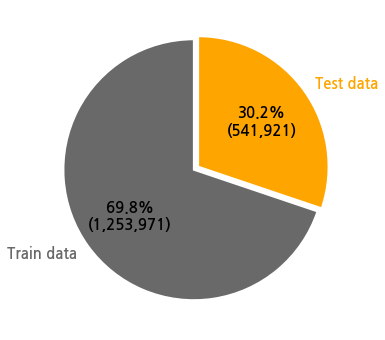

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
colors=["dimgrey","orange"]
patches, texts, pcts = ax.pie(x=cnt, autopct=lambda pct : func(pct,cnt),
                              wedgeprops={'linewidth':2.0, 'edgecolor':'white'},
                              textprops={'fontweight':'bold'},
                              startangle=90, 
                              labels=["Train data","Test data"],colors=colors,explode=(0,0.04))

for i, patch in enumerate(patches) :
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts,fontweight=700)
plt.show()

- 요일별 고객 주문시간에 대한 Boxplot

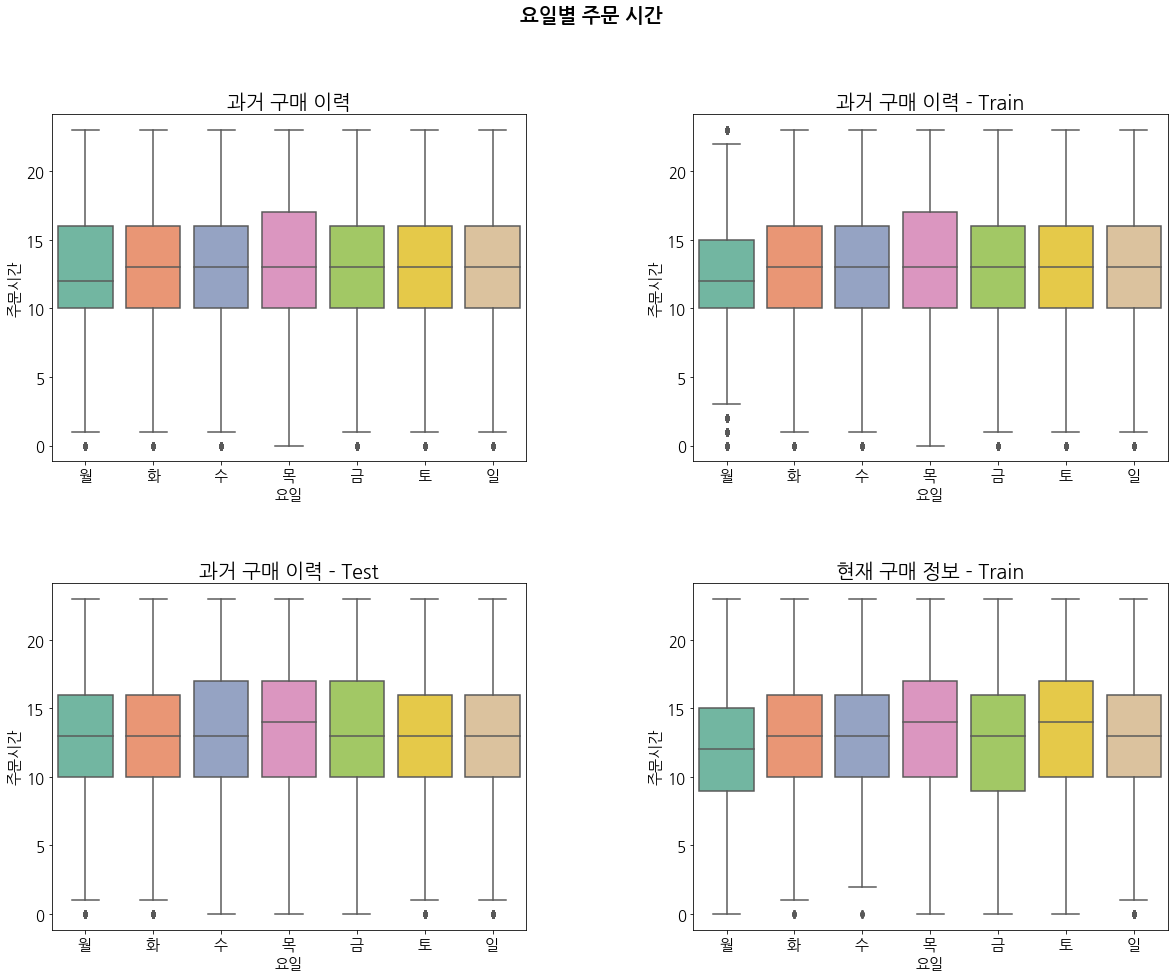

In [54]:
figs, axs = plt.subplots(figsize=(20,15),nrows=2, ncols=2)
fig = sns.boxplot(x = past_data['t_week_day'], y = past_data['order_hour'], ax=axs[0,0], palette = 'Set2',order=weekday_order)
fig.set(ylabel="주문시간",xlabel="요일")
fig = sns.boxplot(x = 't_week_day', y = 'order_hour', data = train_x_past, ax=axs[0,1], palette = 'Set2',order=weekday_order)
fig.set(ylabel="주문시간",xlabel="요일")
fig = sns.boxplot(x = 't_week_day', y = 'order_hour', data = test_x_past, ax=axs[1,0], palette = 'Set2',order=weekday_order)
fig.set(ylabel="주문시간",xlabel="요일")
fig = sns.boxplot(x = 't_week_day', y = 'order_hour', data = train_x_current, ax=axs[1,1], palette = 'Set2',order=weekday_order)
fig.set(ylabel="주문시간",xlabel="요일")


axs[0,0].set_title('과거 구매 이력', fontsize = 20)
axs[0,1].set_title('과거 구매 이력 - Train', fontsize = 20)
axs[1,0].set_title('과거 구매 이력 - Test', fontsize = 20)
axs[1,1].set_title('현재 구매 정보 - Train', fontsize = 20)

figs.suptitle('요일별 주문 시간', fontsize = 20, weight = 'bold')
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)
figs.show()

- 요일별 고객의 주문 수 비중

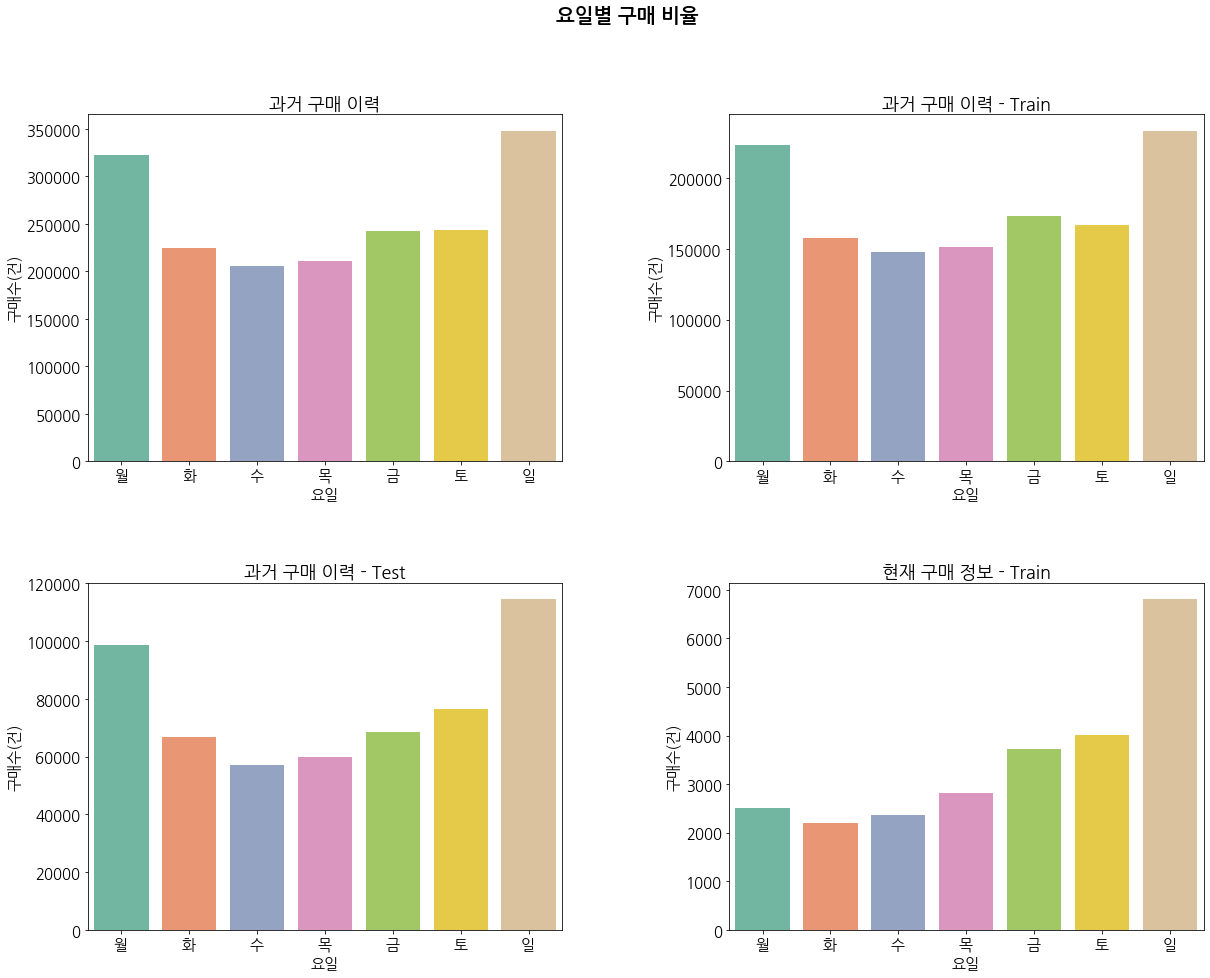

In [55]:
fig, axs = plt.subplots(figsize=(20,15), nrows=2, ncols=2)

sns.barplot(x = 't_week_day', y = 'order_id' , data = pd.DataFrame(past_data.groupby('t_week_day')['order_id'].count().reset_index(drop=False)),ax=axs[0,0], palette = 'Set2',order=weekday_order)
sns.barplot(x = 't_week_day', y = 'order_id' , data = pd.DataFrame(train_x_past.groupby('t_week_day')['order_id'].count().reset_index(drop=False)),ax=axs[0,1], palette = 'Set2',order=weekday_order)
sns.barplot(x = 't_week_day', y = 'order_id' , data = pd.DataFrame(test_x_past.groupby('t_week_day')['order_id'].count().reset_index(drop=False)),ax=axs[1,0], palette = 'Set2',order=weekday_order)
sns.barplot(x = 't_week_day', y = 'order_id' , data = pd.DataFrame(train_x_current.groupby('t_week_day')['order_id'].count().reset_index(drop=False)),ax=axs[1,1], palette = 'Set2',order=weekday_order)

fig.suptitle('요일별 구매 비율', fontsize = 20, weight = 'bold')
axs[0,0].set(title = '과거 구매 이력', xlabel ='요일', ylabel = '구매수(건)')
axs[0,1].set(title = '과거 구매 이력 - Train', xlabel ='요일', ylabel = '구매수(건)')
axs[1,0].set(title = '과거 구매 이력 - Test', xlabel ='요일', ylabel = '구매수(건)')
axs[1,1].set(title = '현재 구매 정보 - Train', xlabel ='요일', ylabel = '구매수(건)')
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)

- 시간별 주문 수 분포

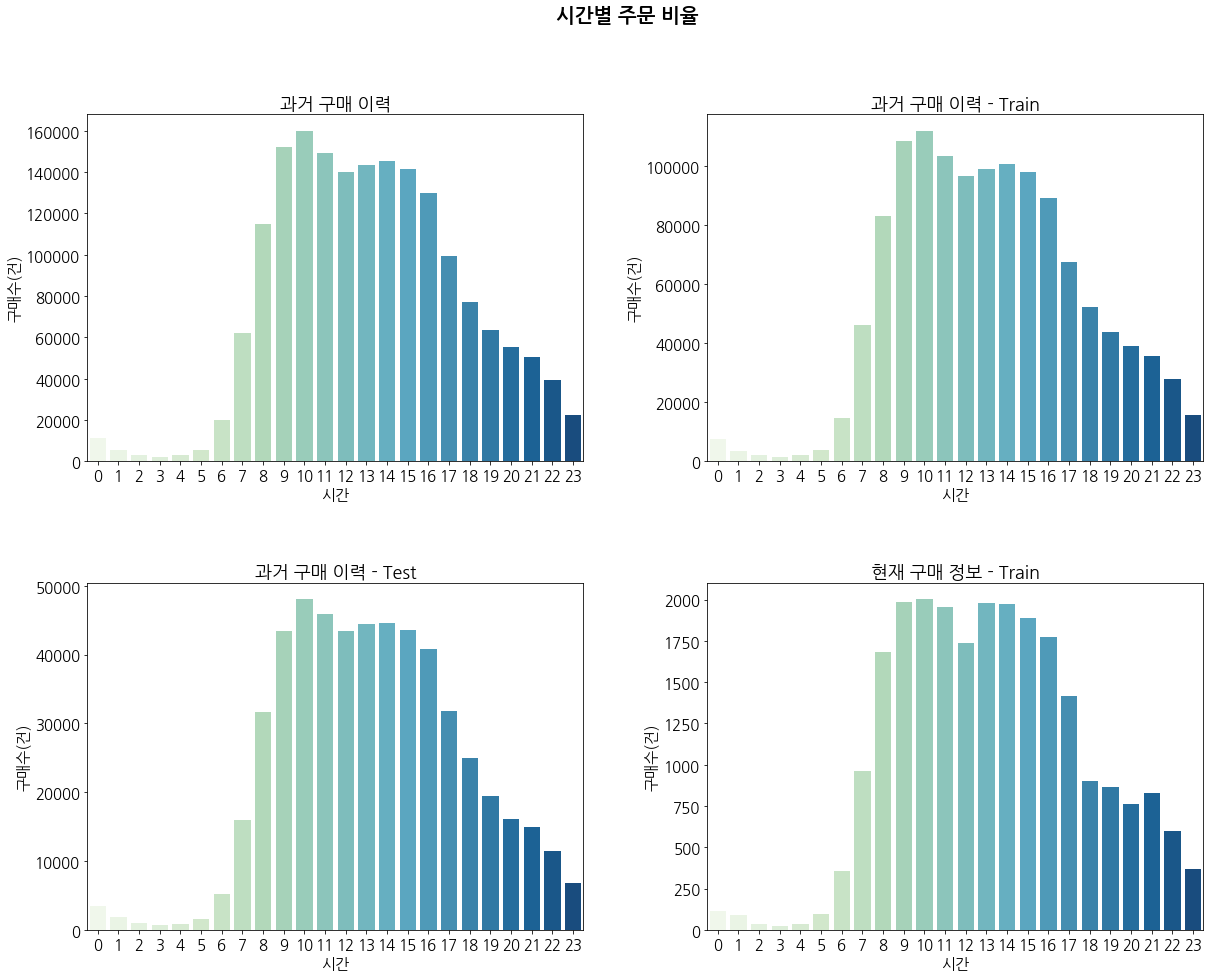

In [56]:
fig, axs = plt.subplots(figsize=(20,15),nrows=2, ncols=2)
s1 = sns.barplot(x = 'order_hour', y = 'order_id' , data = pd.DataFrame(past_data.groupby('order_hour')['order_id'].count().reset_index(drop=False)),ax=axs[0,0], palette = 'GnBu')
s2 = sns.barplot(x = 'order_hour', y = 'order_id' , data = pd.DataFrame(train_x_past.groupby('order_hour')['order_id'].count().reset_index(drop=False)),ax=axs[0,1], palette = 'GnBu')
s3 = sns.barplot(x = 'order_hour', y = 'order_id' , data = pd.DataFrame(test_x_past.groupby('order_hour')['order_id'].count().reset_index(drop=False)),ax=axs[1,0], palette = 'GnBu')
s4 = sns.barplot(x = 'order_hour', y = 'order_id' , data = pd.DataFrame(train_x_current.groupby('order_hour')['order_id'].count().reset_index(drop=False)),ax=axs[1,1], palette = 'GnBu')

fig.suptitle('시간별 주문 비율', fontsize = 20, weight = 'bold')
axs[0,0].set(title = '과거 구매 이력', xlabel ='시간', ylabel = '구매수(건)')
axs[0,1].set(title = '과거 구매 이력 - Train', xlabel ='시간', ylabel = '구매수(건)')
axs[1,0].set(title = '과거 구매 이력 - Test', xlabel ='시간', ylabel = '구매수(건)')
axs[1,1].set(title = '현재 구매 정보 - Train', xlabel ='시간', ylabel = '구매수(건)')
plt.subplots_adjust(wspace = 0.25, hspace = 0.35)

- 요일 및 시간에 따른 재주문 비율

In [57]:
graph_01 = pd.crosstab(index = past_data['t_week_day'], columns = past_data['is_reordered'], normalize = True).reindex(weekday_order)
graph_02 = pd.crosstab(index = past_data['order_hour'], columns = past_data['is_reordered'], normalize = True)

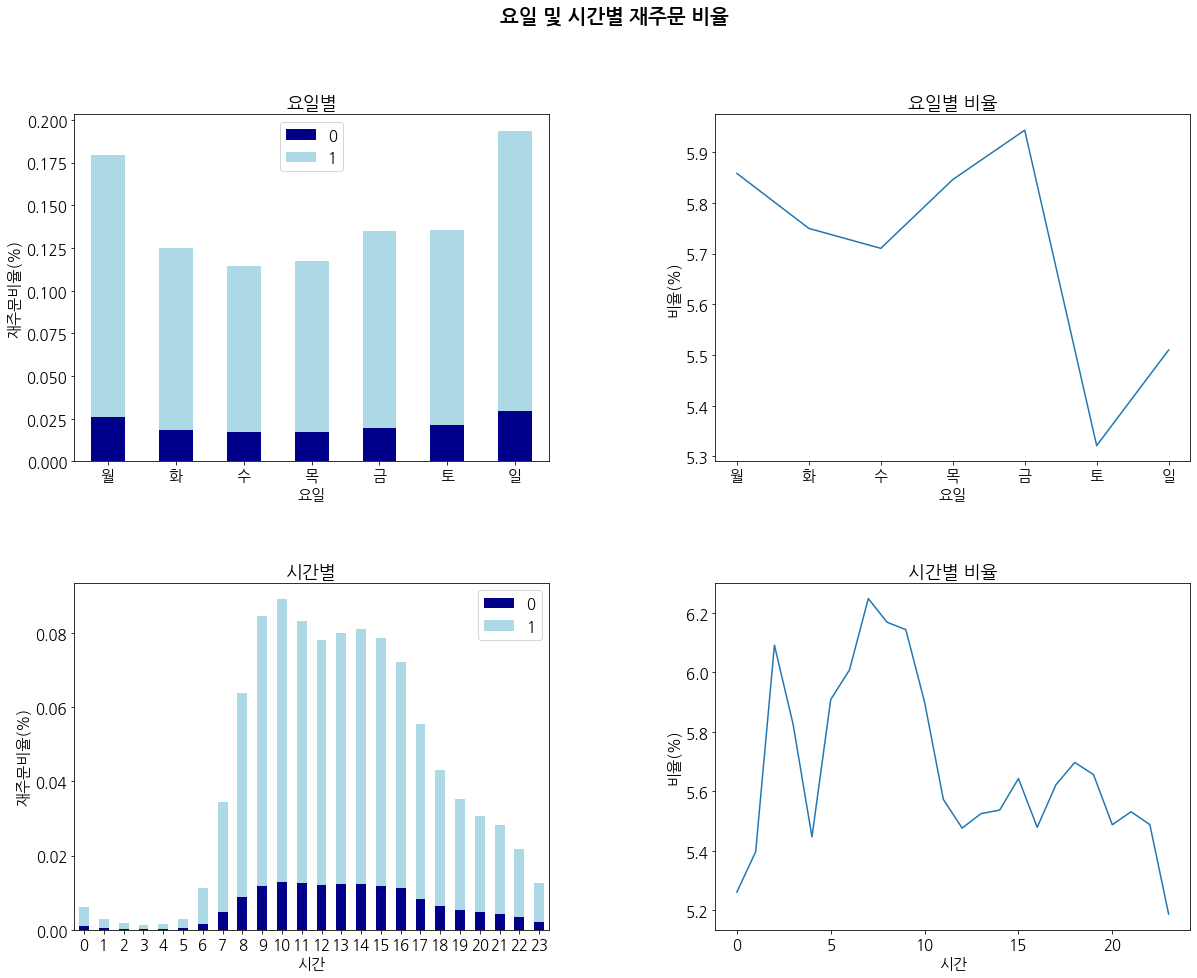

In [58]:
fig, axs = plt.subplots(figsize=(20,15),nrows=2, ncols=2)
graph_01.plot.bar(stacked=True, ax=axs[0,0], color = ['DarkBlue','LightBlue'])
sns.lineplot(data = graph_01['1'] / graph_01['0'], ax=axs[0,1], palette = 'GnBu')
graph_02.plot.bar(stacked=True, ax=axs[1,0], color = ['DarkBlue','LightBlue'])
sns.lineplot(data = graph_02['1'] / graph_02['0'], ax=axs[1,1], palette = 'GnBu')


fig.suptitle('요일 및 시간별 재주문 비율', fontsize = 20, weight = 'bold')
axs[0,0].tick_params(axis = 'x', rotation = 0)
axs[0,0].set(title = '요일별', xlabel ='요일', ylabel = '재주문비율(%)')
axs[0,1].set(title = '요일별 비율', xlabel ='요일', ylabel = '비율(%)')
axs[1,0].tick_params(axis = 'x', rotation = 0)
axs[1,0].set(title = '시간별', xlabel ='시간', ylabel = '재주문비율(%)')
axs[1,1].set(title = '시간별 비율', xlabel ='시간', ylabel = '비율(%)')
axs[0,0].legend()
axs[1,0].legend()
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)

- 요일 및 시간에 따른 주문 빈도

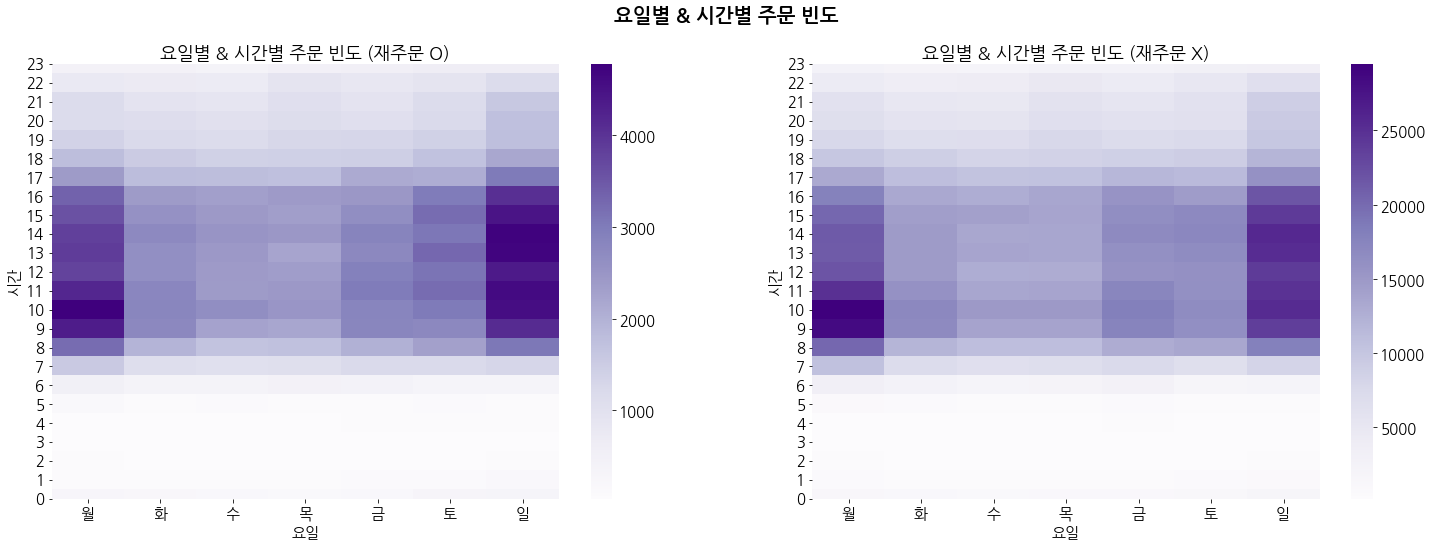

In [59]:
fig, axs = plt.subplots(figsize=(25,8),nrows=1, ncols=2)

days_hours_00 = past_data[past_data.is_reordered == '0'].groupby(['order_hour','t_week_day'])['order_number'].agg('count').reset_index() 
days_hours_00 = days_hours_00.pivot('order_hour', 't_week_day', 'order_number').sort_values("order_hour", ascending= False)
days_hours_00 = days_hours_00[['월','화','수','목','금','토','일']]

days_hours_01 = past_data[past_data.is_reordered == '1'].groupby(['order_hour','t_week_day'])['order_number'].agg('count').reset_index() 
days_hours_01 = days_hours_01.pivot('order_hour', 't_week_day', 'order_number').sort_values("order_hour", ascending= False)
days_hours_01 = days_hours_01[['월','화','수','목','금','토','일']]

sns.heatmap(days_hours_00, cmap = 'Purples', ax=axs[0]) 
sns.heatmap(days_hours_01, cmap = 'Purples', ax=axs[1]) 

fig.suptitle('요일별 & 시간별 주문 빈도', fontsize = 20, weight = 'bold')
axs[0].set(title = '요일별 & 시간별 주문 빈도 (재주문 O)', xlabel ='요일', ylabel = '시간')
axs[1].set(title = '요일별 & 시간별 주문 빈도 (재주문 X)', xlabel ='요일', ylabel = '시간')
axs[0].tick_params(axis = 'both', rotation = 0)
axs[1].tick_params(axis = 'both', rotation = 0)

- 고객당 주문 횟수의 분포

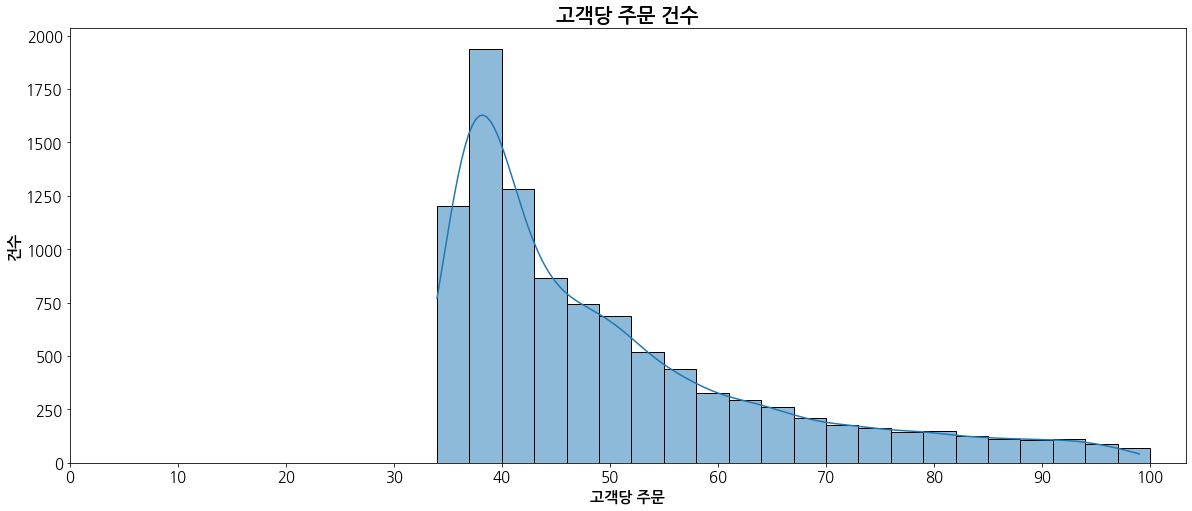

In [60]:
plt.figure(figsize = (20,8)) 
sns.histplot(past_data.groupby('cstno')['order_id'].nunique(), binwidth=3, kde = True, palette = 'GnBu')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.title('고객당 주문 건수', fontsize = 20, weight = 'bold') 
plt.ylabel('건수', fontsize = 15, weight = 'bold') 
plt.xlabel('고객당 주문', fontsize = 15, weight = 'bold') 
plt.show()

- 재주문까지 기간 비율

In [61]:
past_data['order_interval'] = pd.to_numeric(past_data['order_interval'])

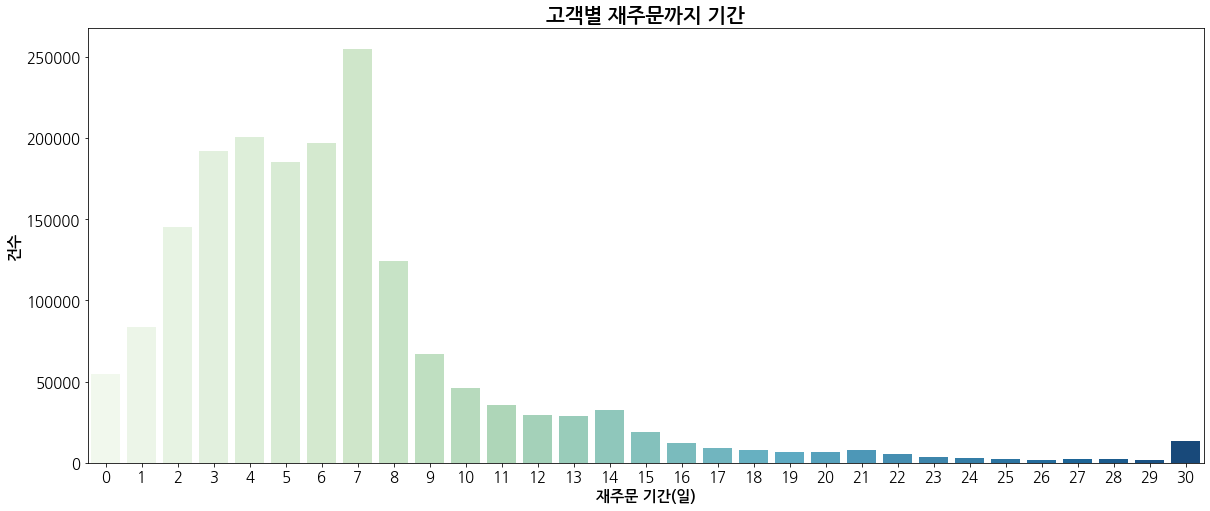

In [62]:
plt.figure(figsize=(20,8))
sns.countplot(past_data['order_interval'], palette = 'GnBu')
plt.title('고객별 재주문까지 기간', fontsize = 20, weight = 'bold')
plt.ylabel('건수', fontsize = 15, weight = 'bold')
plt.xlabel('재주문 기간(일)', fontsize = 15, weight = 'bold')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i'))
plt.show;

- 구매 여부별 장바구니에 담아지는 순서 비율

Text(0, 0.5, '첫구매율(%)')

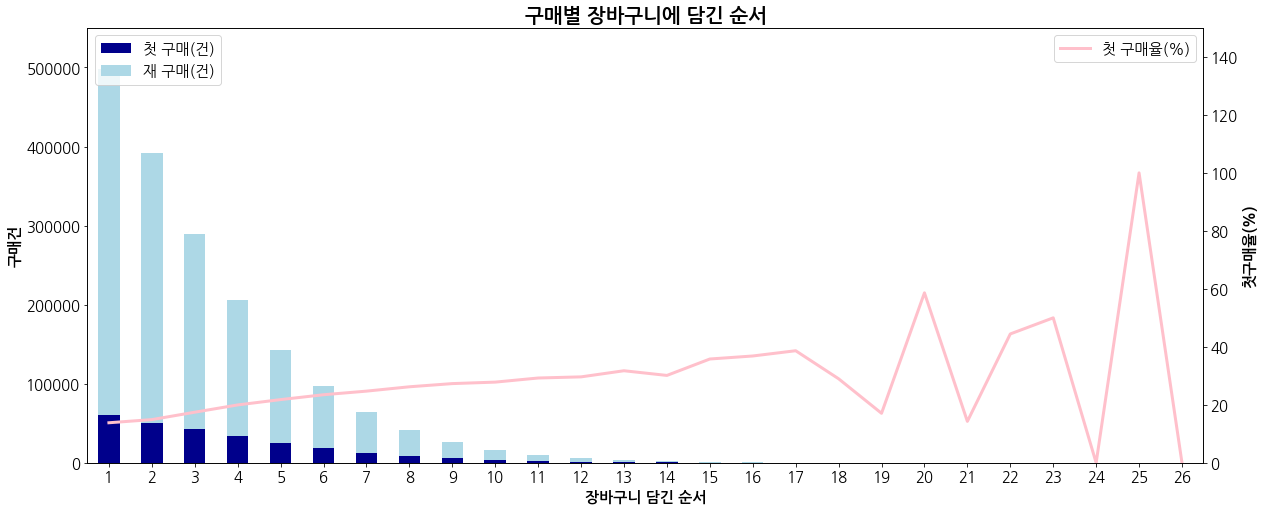

In [63]:
graph_a_00 = pd.DataFrame(past_data[past_data.is_reordered == '0'].groupby(['is_reordered','new_add'])['cstno'].count()).reset_index()
graph_a_00.rename(columns = {'cstno' : 'count_r0'}, inplace = True)
graph_a_01 = pd.DataFrame(past_data[past_data.is_reordered == '1'].groupby(['is_reordered','new_add'])['cstno'].count()).reset_index()
graph_a_01.rename(columns = {'cstno' : 'count_r1'}, inplace = True)

graph_a = pd.merge(graph_a_00, graph_a_01, on = 'new_add', how ='right').fillna(0)
graph_a.drop(['is_reordered_x','is_reordered_y'], axis = 1, inplace = True)
graph_a['new_add'] = graph_a['new_add'].astype(str)

graph_b = graph_a.copy()
graph_b['ratio'] = graph_a.count_r0/graph_a.count_r1*100

ax1 = graph_a.plot(x = 'new_add', kind = 'bar', stacked=True, figsize = (20,8), color = ['DarkBlue','LightBlue'])
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'new_add', y = 'ratio', data = graph_b, linewidth = 3, color = 'Pink', markers = None)

ax1.set_ylim(0,550000)
ax2.set_ylim(0, 150)
ax1.tick_params(axis = 'x', rotation = 0)
plt.title('구매별 장바구니에 담긴 순서', fontsize = 20, weight = 'bold')
ax1.legend(['첫 구매(건)','재 구매(건)'],loc='upper left')
ax2.legend(['첫 구매율(%)'])
ax1.set_xlabel('장바구니 담긴 순서', fontsize = 15, weight = 'bold')
ax1.set_ylabel('구매건', fontsize = 15, weight = 'bold')
ax2.set_ylabel('첫구매율(%)', fontsize = 15, weight = 'bold')

- 재구매비율

In [64]:
cnt= past_data.is_reordered.value_counts()

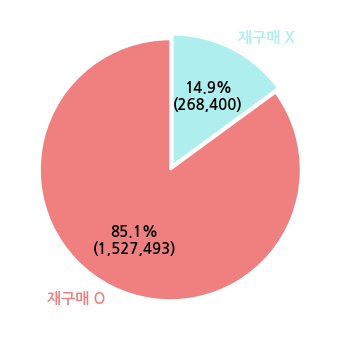

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
colors=["lightcoral","paleturquoise"]
patches, texts, pcts = ax.pie(x=cnt, autopct=lambda pct : func(pct,cnt),
                              wedgeprops={'linewidth':2.0, 'edgecolor':'white'},
                              textprops={'fontweight':'bold'},
                              startangle=90, 
                              labels=["재구매 O","재구매 X"],colors=colors,explode=(0,0.04))

for i, patch in enumerate(patches) :
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts,fontweight=700)
plt.show()

#### **3.2 Product's<a class='anchor' id="2">**

- 상품 정보 결합

In [5]:
past_data_p = pd.merge(past_data,products_info,on='product_id',how='left')

NameError: name 'past_data' is not defined

- 분류별 상품 파악 (Division name → Category_name → Name)

In [ ]:
tree_data = past_data_p.groupby(['division_name','category_name','name'])['order_id'].count().reset_index()
tree_data.rename(columns = {'order_id' : 'count'}, inplace = True)

fig = px.treemap(tree_data, path = [px.Constant('all'), 'division_name', 'category_name', 'name'], values ='count', width = 1500, height = 700)
fig.update_traces(root_color = 'lightgrey', outsidetextfont_size = 15)
fig.update_layout(margin = dict(t=50, l = 0, r= 50, b= 50), uniformtext = dict(minsize=100), font_size = 15)
fig.show()

- 구매 상위 12 상품

In [68]:
product_01 = past_data_p.groupby(['name'])['order_number'].agg('count').sort_values(ascending = False).reset_index()[0:12]

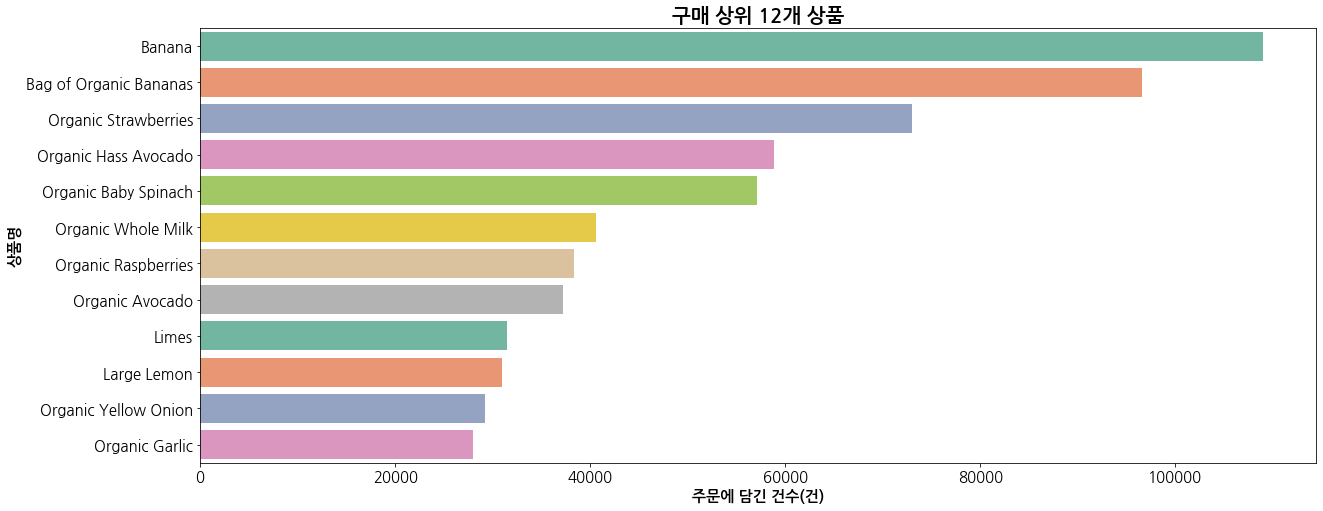

In [69]:
plt.figure(figsize=(20,8))
sns.barplot(data = product_01, x = 'order_number', y = 'name', palette = 'Set2')
plt.ylabel('상품명', fontsize = 15, weight = 'bold')
plt.xlabel('주문에 담긴 건수(건)', fontsize = 15, weight = 'bold')
plt.title('구매 상위 12개 상품', fontsize = 20, weight = 'bold')
plt.show;

- 주문(장바구니)에 담긴 상품 수

In [70]:
product_02 = past_data_p.groupby(['order_id'])['add_order'].max().reset_index()

In [71]:
product_02.describe()

,add_order
count,498367.000000
mean,9.409473
std,7.179915
min,1.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,115.000000


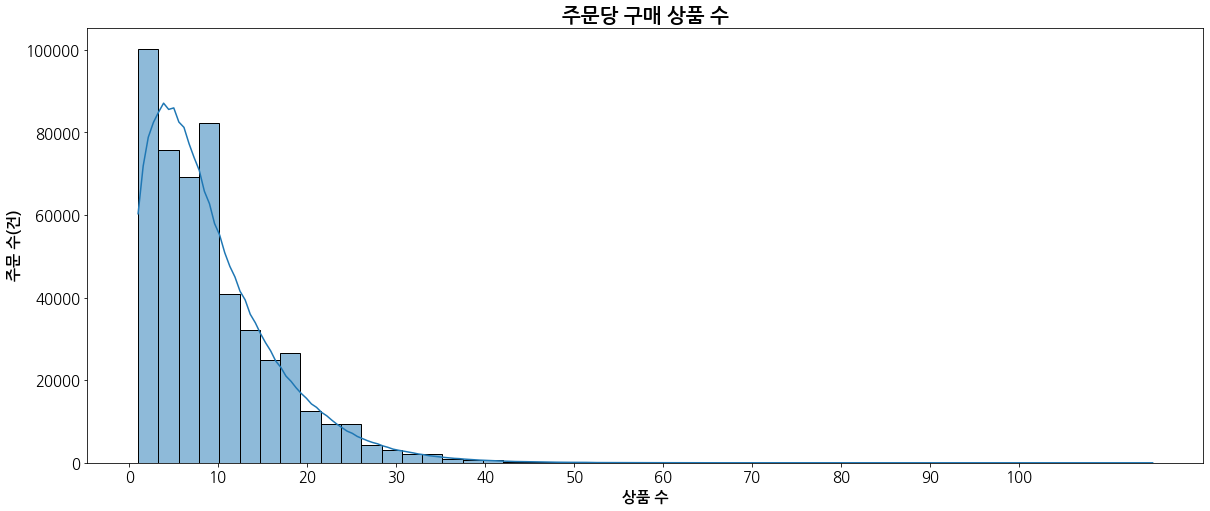

In [72]:
plt.figure(figsize=(20,8))
sns.histplot(data = product_02, x = 'add_order', bins = 50, kde = True, palette = 'GnBu')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('주문 수(건)', fontsize = 15, weight = 'bold')
plt.xlabel('상품 수', fontsize = 15, weight = 'bold')
plt.title('주문당 구매 상품 수', fontsize = 20, weight = 'bold')
plt.show;

- 가장 많이 담긴 Category (상위 10개)

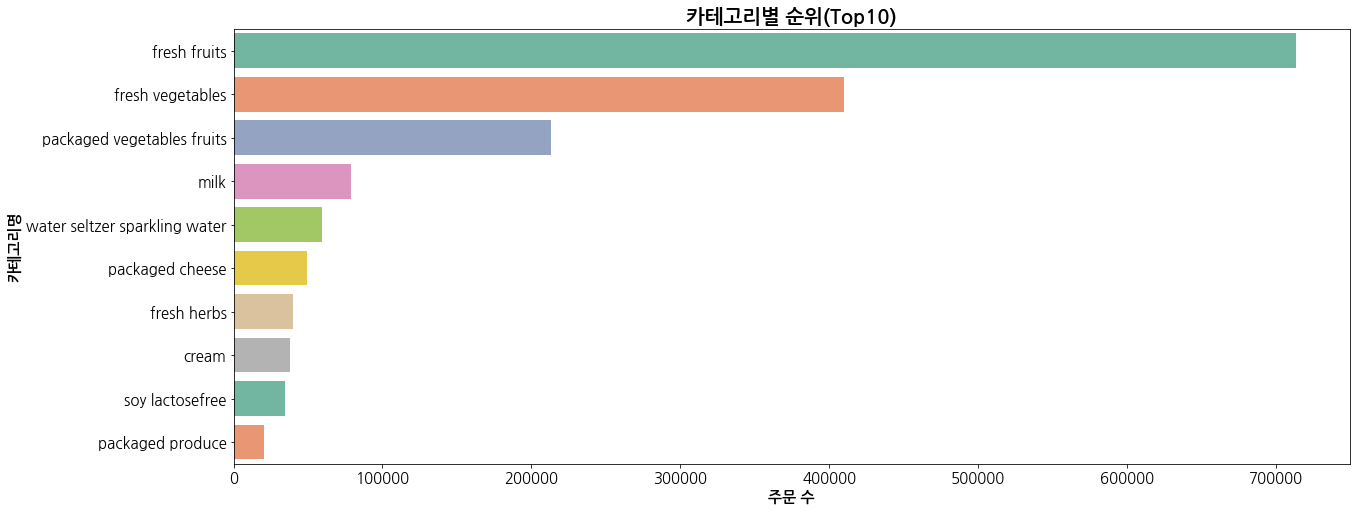

In [73]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'add_order', y = 'category_name', data = past_data_p.groupby(['category_name'])['add_order'].count().sort_values(ascending = False).reset_index()[0:10], palette = 'Set2')
plt.ylabel('카테고리명', fontsize = 15, weight = 'bold')
plt.xlabel('주문 수', fontsize = 15, weight = 'bold')
plt.tick_params(axis = 'y', labelsize = 15)
plt.title('카테고리별 순위(Top10)', fontsize = 20, weight = 'bold')
plt.show;

In [ ]:
plt.figure(figsize=(20,8)) 
sns.boxplot(x = 'category_name',  y = 'order_interval', data = past_data_p, palette = 'Set2') 
plt.ylabel('경과 일수', fontsize = 15, weight = 'bold') 
plt.xlabel('카테고리', fontsize = 15, weight = 'bold') 
plt.tick_params(axis = 'x', rotation = 90, labelsize = 15) 
plt.title('직전 구매 경과 일수', fontsize = 20, weight = 'bold') 
plt.show; 

In [ ]:
plt.figure(figsize=(20,8)) 
sns.boxplot(x = 'category_name',  y = 'new_add', data = past_data_p, palette = 'Set2') 
plt.ylabel('담은 순서', fontsize = 15, weight = 'bold') 
plt.xlabel('카테고리', fontsize = 15, weight = 'bold') 
plt.tick_params(axis = 'x', rotation = 90, labelsize = 15) 
plt.title('담은 순서', fontsize = 20, weight = 'bold') 
plt.show; 

>

#### **3.3 Network Analysis<a class='anchor' id="3">**

- 상품 Network (co-purchasing 관계)

In [77]:
%%time
topN = past_data_p.groupby(['name'])['add_order'].count().sort_values(ascending = False).reset_index()[0:100]
topN_2 =  topN.sort_values(by = 'name')
topN_3 = topN.reset_index(drop=True)

net_past_dat = past_data_p[["order_id","name"]].sort_values(by="order_id").reset_index(drop='True')
net_past_dat2 = net_past_dat.merge(topN[["name"]], how = 'inner', on = 'name')

matrix_01 = pd.get_dummies(net_past_dat.set_index('order_id')['name'].astype(str)).max(level=0).sort_index()

matrix_01 = matrix_01.astype(int)
matrix_02 = matrix_01.transpose()
matrix_03 = matrix_02.dot(matrix_01)

network_table = pd.DataFrame(matrix_03)

CPU times: user 19.6 s, sys: 3.25 s, total: 22.9 s
Wall time: 22.9 s


In [ ]:
#상위 10개 상품간 Network 
topN_3_name = np.array(topN_3.name.head(10)) 
network_table_top10 = network_table[topN_3_name] 
network_table_top10 = network_table_top10.loc[topN_3_name] 

In [ ]:
name = list(net_past_dat2.name.unique()) 
name.sort() 
network_table.index = name 
network_table.columns = name 
graph = nx.from_pandas_adjacency(network_table) 

#가중치 
size = 0.0005 
width_w = [] 

for i in range(len(network_table)): 
        for j in range(len(network_table.columns)): 
                width_w.append(network_table.iloc[i][j]*size) 
                 

plt.subplots(figsize=(100,100)) 
layout = nx.spring_layout(graph,k=30, iterations = 25, seed = 7) 
d = dict(graph.degree) 
nx.draw(graph,pos=layout,with_labels='True',font_size=50,font_weight='bold',node_size=[v for v in topN_2.add_order], width = width_w 
        ,node_color = 'lightBlue', font_color = 'DarkBlue', edge_color = 'Grey') 

cm = sns.light_palette('lightBlue', as_cmap = True) 
network_table_top10.style.background_gradient(cmap=cm)  

> 상품(Name)의 Network 그림을 기반으로 고객 주문 건당 같이 구매하는 상품의 비중을 알 수 있습니다.  
대표적으로, Banana를 구매한 주문은 Lime Sparkling Water와 함께 많이 이루어졌으며, Bag of Organic Bananas를 구매한 주문은 Green Bell Pepper와 함께 이루어진 것을 볼 수 있습니다.  
같은 과일인 Banana와 Bag of Organic Bananas는 다른 상품간의 Network에 비해 약함을 알 수 있습니다.  
Organic 상품을 구매하는 고객은 다른 Organic 상품을 같이 구매하는 것을 알 수 있습니다.(Organic Red Onion과 Organic Baby Spinach, Organic Strawberries와 Bag of Organic Bananas)

#### **3.4. Cluster Analysis<a class='anchor' id="4">**

> 고객의 과거 구매 이력(Category)을 토대로 Cluster analysis를 진행하였습니다. K-means algorithm을 이용하였고, optimal cluster number를 구하기 위해 cluster의 stability를 고려하였습니다.

##### **- Dataset for CA with product's category**  

- 고객별 구매한 상품의 category

In [79]:
CA_data_0 = pd.crosstab(past_data_p.cstno, past_data_p.category_name)

In [80]:
tmp = test_x_past
tmp["Set"] = "Test"

In [81]:
CA_data_1 = CA_data_0.merge(tmp[['cstno','Set']],how='left',on='cstno')
CA_data_1 = CA_data_1.drop_duplicates()

In [82]:
CA_data_1.fillna("Train",inplace=True)
CA_data_1.Set.value_counts()

Train    5859
Test     4141
Name: Set, dtype: int64

In [83]:
CA_data_1['total'] = CA_data_1.sum(axis=1)
CA_data_1.head()

,cstno,bread,butter,canned meals beans,cream,eggs,fresh dips tapenades,fresh fruits,fresh herbs,fresh vegetables,...,packaged cheese,packaged poultry,packaged produce,packaged vegetables fruits,refrigerated,soft drinks,soy lactosefree,water seltzer sparkling water,Set,total
0,10000,41,1,6,21,16,0,117,1,85,...,23,0,0,11,0,0,9,3,Train,344
1,100001,0,0,0,0,2,0,135,18,97,...,2,0,0,35,20,0,29,3,Train,344
2,100041,0,0,4,15,0,0,45,0,42,...,5,0,1,27,0,0,0,15,Test,163
165,100046,0,0,0,0,0,0,117,1,92,...,0,0,1,15,0,0,0,3,Train,233
166,100071,0,0,0,0,3,0,39,22,114,...,2,0,0,29,0,0,7,4,Train,220


- 고객별 구매 요일

In [84]:
tmp1 = pd.crosstab(past_data_p.cstno, past_data_p.t_week_day)

In [85]:
CA_data_2 = CA_data_1.merge(tmp1, on='cstno', how='left')
CA_data_2.head()

,cstno,bread,butter,canned meals beans,cream,eggs,fresh dips tapenades,fresh fruits,fresh herbs,fresh vegetables,...,water seltzer sparkling water,Set,total,금,목,수,월,일,토,화
0,10000,41,1,6,21,16,0,117,1,85,...,3,Train,344,34,34,27,78,96,39,36
1,100001,0,0,0,0,2,0,135,18,97,...,3,Train,344,39,25,72,85,6,19,98
2,100041,0,0,4,15,0,0,45,0,42,...,15,Test,163,29,10,10,26,18,44,26
3,100046,0,0,0,0,0,0,117,1,92,...,3,Train,233,34,18,34,35,35,48,29
4,100071,0,0,0,0,3,0,39,22,114,...,4,Train,220,7,9,30,99,45,11,19


In [86]:
del tmp1

- 고객별 Organic 상품 구매 횟수

In [87]:
past_data_p.name.str.contains("Organic").sum()

1080433

In [88]:
past_data_p.name.str.contains("organic").sum()

0

In [89]:
tmp2 = past_data_p.loc[past_data_p.name.str.contains("Organic")]

In [90]:
tmp3 = pd.DataFrame(tmp2.groupby('cstno')['order_id'].count())
tmp3.columns = ['cnt']

In [91]:
CA_data_3 = CA_data_2.merge(tmp3,on='cstno',how='left')

In [92]:
CA_data_3.cnt.isna().sum()

110

In [93]:
CA_data_3.cnt.fillna(0,inplace=True)

In [94]:
CA_data_3.cnt.describe()

count    10000.000000
mean       108.043300
std         78.101325
min          0.000000
25%         52.000000
50%         93.000000
75%        146.000000
max        636.000000
Name: cnt, dtype: float64

In [95]:
CA_data_3['prop_organ'] = CA_data_3['cnt']/CA_data_3['total']

In [96]:
CA_data_3.prop_organ.describe()

count    10000.000000
mean         0.571695
std          0.228452
min          0.000000
25%          0.431016
50%          0.593451
75%          0.745777
max          1.000000
Name: prop_organ, dtype: float64

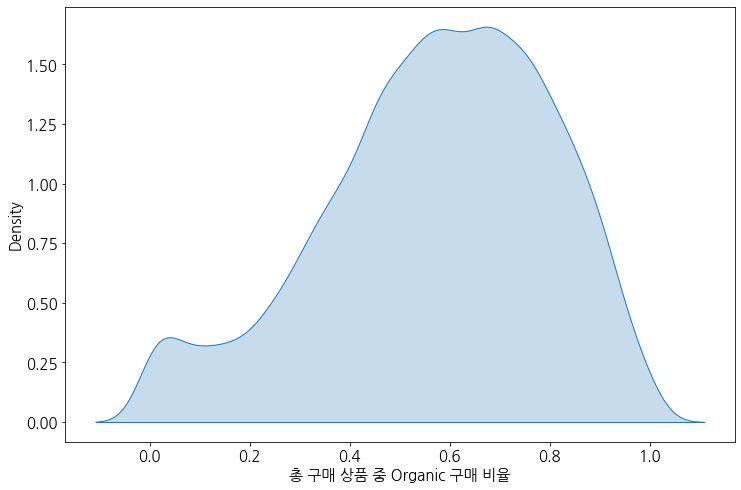

In [97]:
plt.figure(figsize=(12,8))
fig = sns.kdeplot(data=CA_data_3, x="prop_organ",fill=True)
fig.set(xlabel="총 구매 상품 중 Organic 구매 비율")
plt.show()

##### **- Cluster Stability - Kmeans**  

- CA stability 함수 정의

In [98]:
def cluster_stability(X, est, n_iter=5, random_state=None) : 
    labels = []
    indices = []
    for i in range(n_iter) :
        sample_indices = rng.randint(0,X.shape[0],int(X.shape[0]*0.8))
        indices.append(sample_indices)
        est = clone(est)
        if hasattr(est, 'random_state'):
            est.random_state = rng.randint(1e5)
        X_bootstrap = X[sample_indices]
        est.fit(X_bootstrap)
        relabel = -np.ones(X.shape[0], dtype=np.int)
        relabel[sample_indices] = est.labels_
        labels.append(relabel)
    scores = []
    for l, i in zip(labels,indices):
        for k, j in zip(labels,indices):
            in_both = np.intersect1d(i,j)
            scores.append(adjusted_rand_score(l[in_both],k[in_both]))
    return np.mean(scores)

In [99]:
X = scale(CA_data_3.drop(['cstno','Set'],axis=1))

In [100]:
X1 = pd.DataFrame(X)
X1.columns = CA_data_3.drop(['cstno','Set'],axis=1).columns
X1['Set'] = CA_data_3.Set

In [101]:
X1.index = CA_data_3.index

- Random seed

In [102]:
rng = np.random.RandomState(1)

- Dimension reduction for 2-dim plot

In [103]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [104]:
X_PCA = pca.fit_transform(X)

In [105]:
print(pca.explained_variance_ratio_)

[0.21115128 0.06217258]


: 1st PC는 Total variance의 21.1% 설명하고, 2nd PC는 6.2%정도 설명하는 것으로 나타났습니다.

In [106]:
pca = PCA()
pca.fit(X)

PCA()

In [107]:
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)

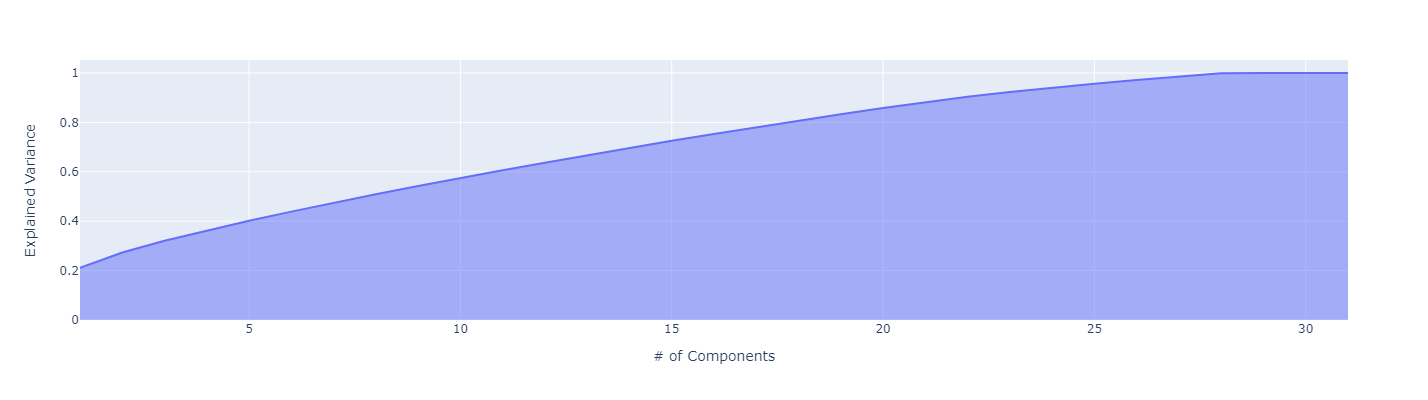

In [108]:
px.area(x=range(1,exp_var_cum.shape[0]+1), y = exp_var_cum, 
        labels={"x" : "# of Components", "y" : "Explained Variance"},width=600,height=400)

: 약 18개의 PC가 Total variance의 약 80%를 설명하는 것으로 확인되었습니다.

2
3
4
5
CPU times: user 2min 21s, sys: 30.3 s, total: 2min 52s
Wall time: 20.4 s


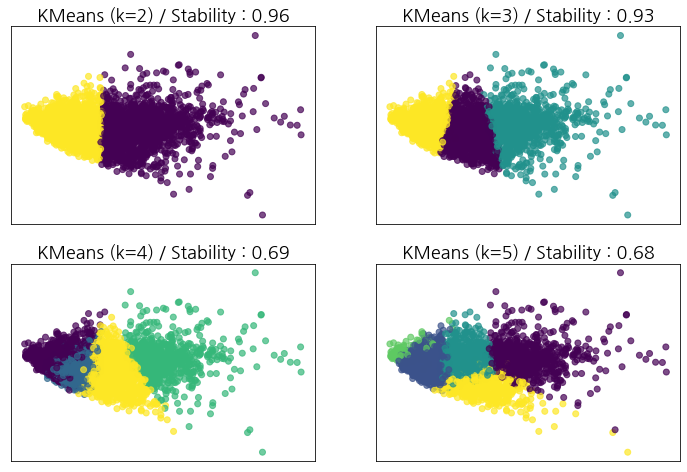

In [109]:
%%time
fig, axes =plt.subplots(2,2,subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,8))
for ax, n_clusters in zip(axes.ravel(),[2,3,4,5]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax.scatter(X_PCA[:,0],X_PCA[:,1],c=km.labels_,alpha=.7)
    ax.set_title("KMeans (k={}) / Stability : {:.2f}".format(n_clusters,cluster_stability(X,KMeans(n_clusters=n_clusters,n_init=5))))
    print(n_clusters)

: K의 범위를 2~5까지 고려하였을 때, Cluster의 개수(k)가 2일 때 Stability가 가장 높은 것을 확인할 수 있었습니다.   

- K=2

In [110]:
km = KMeans(2).fit(X)

In [111]:
Data_scatter = pd.DataFrame(X_PCA)
Data_scatter.columns=["PC1","PC2"]
Data_scatter['Seg'] = ['Seg1' if x==0 else 'Seg2' for x in km.labels_]

In [112]:
Data_scatter["Set"] = CA_data_2.Set

In [113]:
color_dict = dict({'Train' : 'darkgreen', 'Test' : 'lightcoral'})

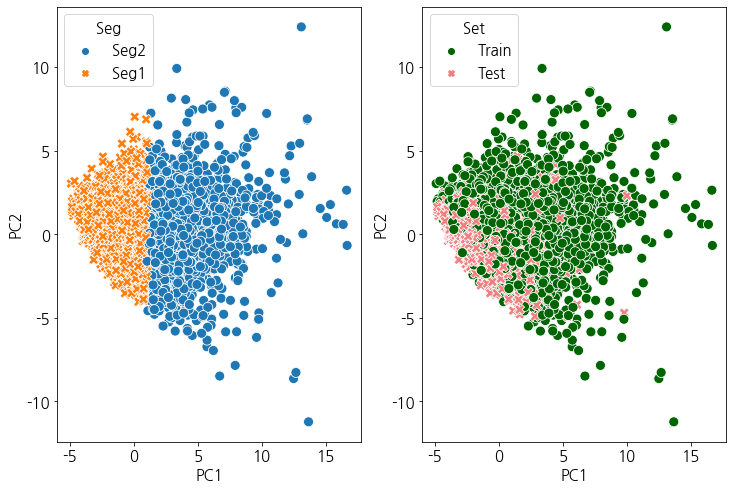

In [114]:
fig, axs = plt.subplots(figsize=(12,8),ncols=2)
sns.scatterplot(x="PC1",y="PC2",
                hue='Seg' ,
                style='Seg', s=100, data=Data_scatter, ax=axs[0])

sns.scatterplot(x="PC1",y="PC2",
                hue='Set' ,
                style='Set', s=100, data=Data_scatter,ax=axs[1], palette=color_dict)

plt.show()

In [1048]:
CA_data_3['Seg'] = Data_scatter.Seg

: 2-dim PC plot에서 좌측의 Segment별로 구분했을 때는 명확하게 구분되었고, Segment별로 Train/Test 구분이 치우쳐져 있는지 확인하였을 때 육안으로 구분하기 어려웠습니다.

In [115]:
pd.crosstab(Data_scatter.Seg,Data_scatter.Set)

Set,Test,Train
Seg,,
Seg1,3766,3644
Seg2,375,2215


: Contingency table을 통해 Test customer가 Segment 1에 많이 치우쳐있다는 것을 확인할 수 있었고, 카이제곱검정 결과 또한 Segment와 Train/Test data가 연관이 있다는 것을 보여주었습니다.

In [116]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(Data_scatter.Seg,Data_scatter.Set))
msg = "Test statistic: {:.2f} \np-value: {:.5f}\nDegree of Freedom: {}"
print(msg.format(chi2,p,dof))

Test statistic: 1043.38 
p-value: 0.00000
Degree of Freedom: 1


In [662]:
Data_scatter_tmp = Data_scatter.drop(['Set'], axis = 1) 
Graph_data_01 = np.log10(CA_data_3.drop(['cstno','Set','Seg'], axis = 1)+1) 
Graph_data_F = pd.concat([Graph_data_01,Data_scatter_tmp], axis = 1) 

- 상품별 분류 (Seg1/Seg2)

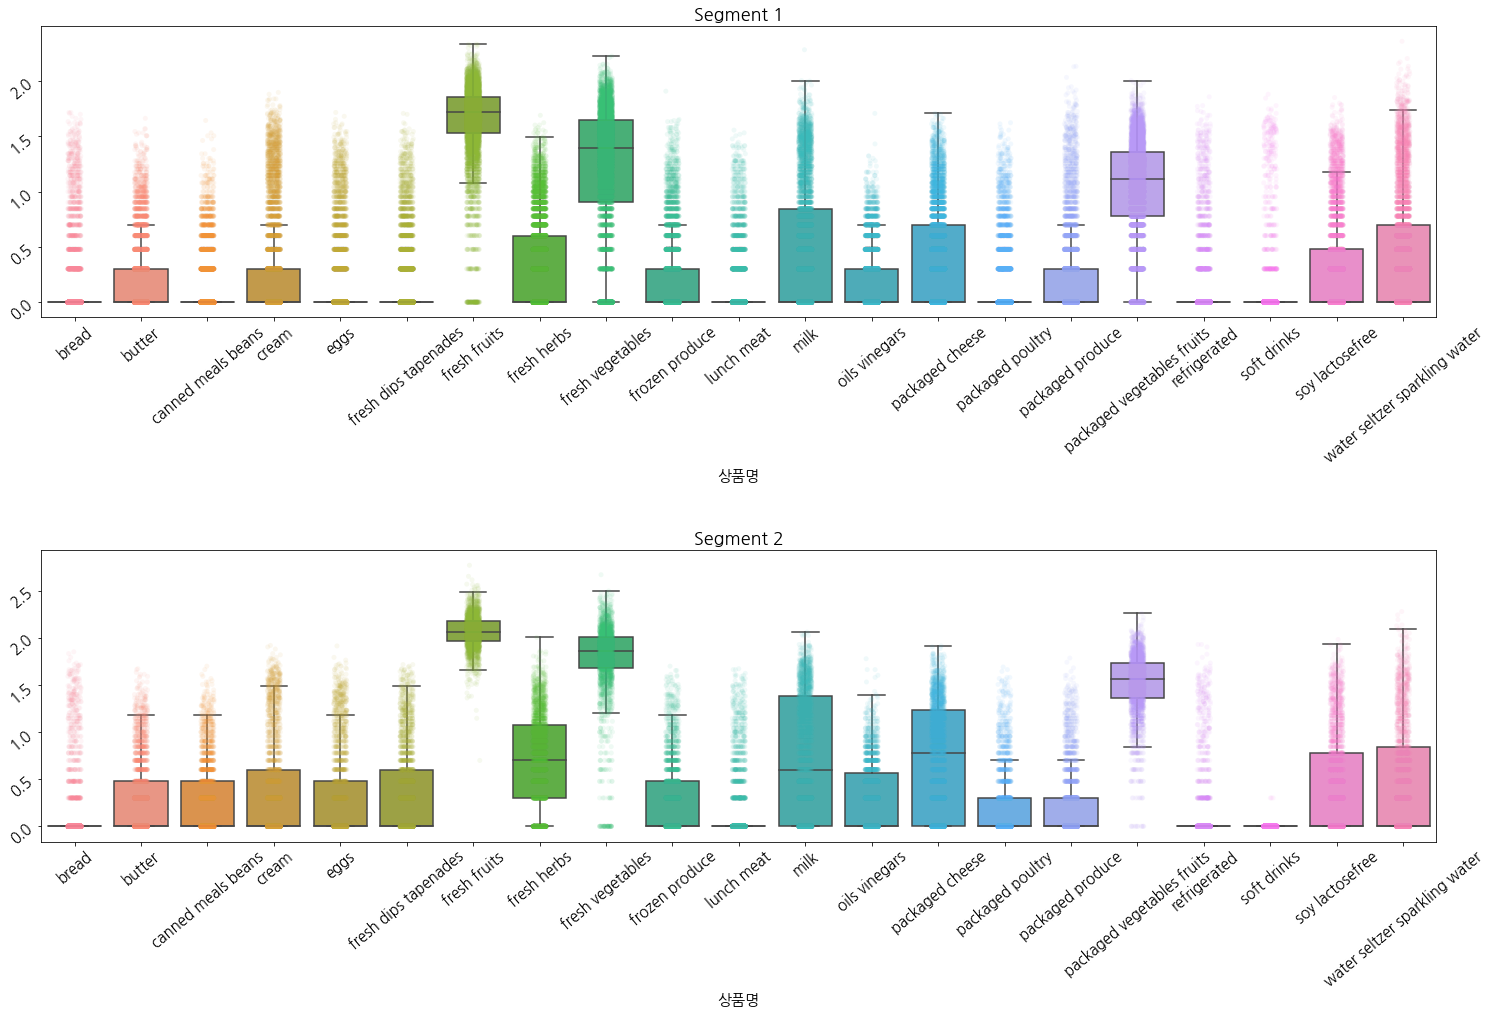

In [671]:
data = Graph_data_F.drop(['total', '금', '목', '수', '월', '일', '토', '화', 'cnt', 'prop_organ', 'PC1', 'PC2'], axis = 1) 

fig, axs = plt.subplots(figsize=(25,11),nrows=2, ncols=1) 
sns.boxplot(data=data[data['Seg'] == 'Seg1'], ax=axs[0], showfliers=False) 
sns.boxplot(data=data[data['Seg'] == 'Seg2'], ax=axs[1], showfliers=False) 

sns.stripplot(data=data[data['Seg'] == 'Seg1'], alpha=.08, ax=axs[0]) 
sns.stripplot(data=data[data['Seg'] == 'Seg2'], alpha=.08, ax=axs[1]) 

axs[0].set(title = 'Seg1', xlabel = '상품명', ylabel = '') 
axs[1].set(title = 'Seg2', xlabel = '상품명', ylabel = '') 

axs[0].tick_params(rotation=40) 
axs[1].tick_params(rotation=40) 

axs[0].set_ylim(-0.5,2.6) 
axs[1].set_ylim(-0.5,2.6) 

fig.suptitle('Cluster', fontsize = 20, weight = 'bold') 
plt.subplots_adjust(hspace = 1) 
plt.show; 
 

> Cluster분석 후 각 Seg별 **Category** 분포 확인 결과,   
**Seg1** 고객들은 **Seg2**고객과 달리, 특정 상품 Category(canned meals beans, eggs, fresh dip tapenades, packaged poultry)를 더 구매하는 경향을 보입니다. 


- 요일별 분류 (Seg1/Seg2)

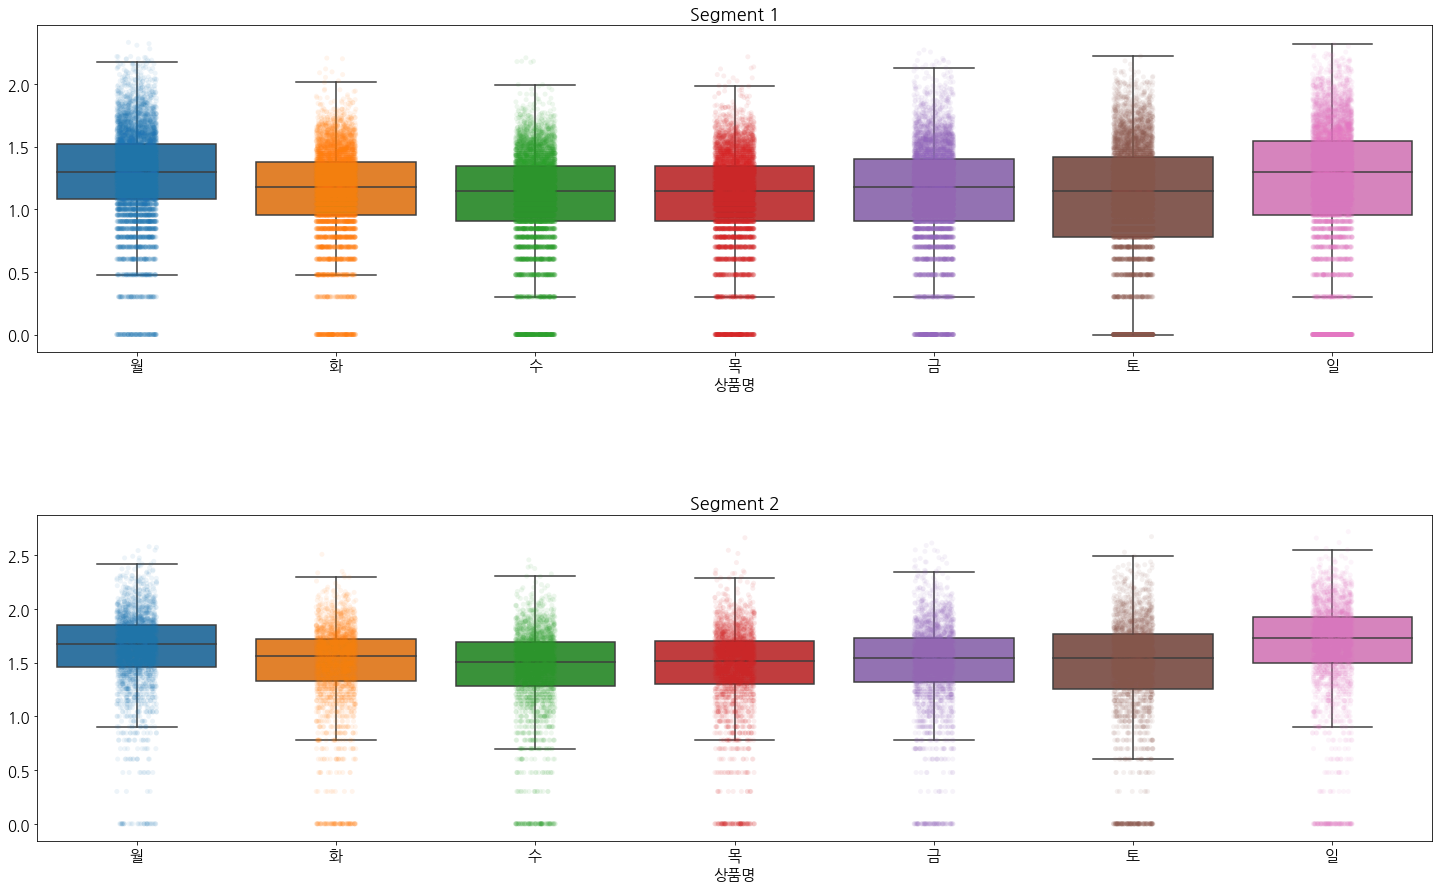

In [672]:
data = Graph_data_F[['월', '화', '수', '목', '금', '토', '일','Seg']] 

fig, axs = plt.subplots(figsize=(25,10),nrows=2, ncols=1) 
sns.boxplot(data=data[data['Seg'] == 'Seg1'], ax=axs[0], showfliers=False) 
sns.boxplot(data=data[data['Seg'] == 'Seg2'], ax=axs[1], showfliers=False) 

sns.stripplot(data=data[data['Seg'] == 'Seg1'], alpha=.08, ax=axs[0]) 
sns.stripplot(data=data[data['Seg'] == 'Seg2'], alpha=.08, ax=axs[1]) 

axs[0].set(title = 'Seg1', xlabel = '상품명', ylabel = '') 
axs[1].set(title = 'Seg2', xlabel = '상품명', ylabel = '') 

axs[0].set_ylim(-0.5,2.6) 
axs[1].set_ylim(-0.5,2.6) 

fig.suptitle('Seg', fontsize = 20, weight = 'bold') 
plt.subplots_adjust(hspace = 0.5) 
plt.show; 


 > 각 Seg별 **요일** 분포 확인 결과,   
요일에 따른 큰 특징이 없지만 두 **Seg** 고객 모두 월요일과 일요일의 구매 선호가 다른 요일에 비해 많은 경향을 보입니다.  
 

- Organic/Non organic 분류 (Seg1/Seg2)

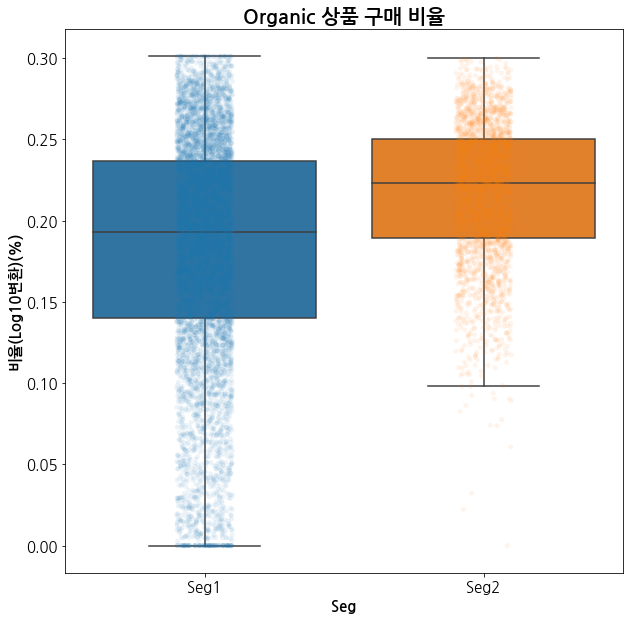

In [668]:
data = Graph_data_F[['Seg', 'prop_organ']] 

plt.subplots(figsize=(10,8)) 
order = ['Seg1', 'Seg2'] 

sns.boxplot(x = 'Seg' , y = 'prop_organ', data=data, showfliers=False, order = order) 
sns.stripplot(x = 'Seg' , y = 'prop_organ', data=data, alpha=.08, order = order) 

plt.title('Organic 상품 구매 비율', fontsize = 20, weight = 'bold') 
plt.ylabel('비율(Log10변환)(%)', fontsize = 15, weight = 'bold') 
plt.xlabel('Seg', fontsize = 15, weight = 'bold') 
plt.show; 

> 각 Seg별 **Organic 상품 구매** 분포 확인 결과, **Seg2** 고객이 **Organic 상품**을 더 구매하는 경향을 보입니다.  

In [117]:
del past_data_p

-------------------------

## Ⅲ. **Methods<a class='anchor' id="Methods">**

> *Ⅲ. Methods*의 *1.Data*절에서는 과거 구매 이력을 기반으로 예측 모형 개발에 사용될 predictors를 고객, 상품과 고객 & 상품 관점에서 생성하였습니다.   
*2.Prediction model development*절에서는 지금까지 구매한 상품 이력을 기반으로 고객의 재구매 여부 예측을 위한 classification 모형을 개발하였습니다.  
또한, 구매한 적 없는 새로운 상품을 구매하는 것을 예측하기 위해서 New prediction 모형도 개발하였습니다.  

### **1. Data<a class='anchor' id="Data2">**

#### **1.1 Predictors<a class='anchor' id="pre">**  
    
    아래와 같이 세 가지 관점에서 predictors를 생성하였습니다.
    
    - Customer's predictors
    - Product's predictors
    - Customer's & Product's predictors
    
   

##### **- Customer's predictors**

 1] 고객별 최대 주문 수

In [118]:
cstno_max_ono = past_data.groupby(["cstno"]).agg({'order_number':max}).reset_index()
cstno_max_ono.columns=["cstno", "cstno_max_ono"]
cstno_max_ono.head()

,cstno,cstno_max_ono
0,10000,72
1,100001,66
2,100041,40
3,100046,65
4,100071,53


2] 고객별 구매한 unique한 제품의 비율

In [119]:
cstno_unique = past_data.groupby(["cstno"]).agg({'product_id':'nunique'}).reset_index()
cstno_unique.columns = ["cstno", "cstno_uni_prod"]
cstno_unique["cstno_total_prod"] = past_data.groupby(["cstno"]).agg({'product_id':'count'}).reset_index().product_id
cstno_unique["uni_prod_prop"] = cstno_unique.cstno_uni_prod /  cstno_unique.cstno_total_prod
cstno_unique.head()

,cstno,cstno_uni_prod,cstno_total_prod,uni_prod_prop
0,10000,44,344,0.127907
1,100001,40,344,0.116279
2,100041,29,163,0.177914
3,100046,33,233,0.141631
4,100071,27,220,0.122727


3] 고객별 재구매 비율

In [120]:
past_data["is_reordered"] = past_data["is_reordered"].astype(int) 

In [121]:
cstno_reord = past_data.groupby(["cstno","order_number"]).agg({'is_reordered':sum}).reset_index()
cstno_reord['is_reordered'] = cstno_reord["is_reordered"].apply(lambda x : 1 if x>0 else 0)
cstno_reord = cstno_reord.groupby('cstno').agg({'order_number' : 'count', 'is_reordered' : sum}).reset_index()
cstno_reord['cstno_reorder_prop'] = cstno_reord['is_reordered'] / cstno_reord['order_number'] 
cstno_reord.head()

,cstno,order_number,is_reordered,cstno_reorder_prop
0,10000,66,63,0.954545
1,100001,63,62,0.984127
2,100041,40,39,0.975000
3,100046,62,59,0.951613
4,100071,51,50,0.980392


4] 고객별 최소, 평균 주문 상품 수

In [122]:
cstno_order_sizes = past_data.groupby(["cstno","order_number"]).agg({'product_id':'count'}).reset_index()
cstno_min_order_size = cstno_order_sizes.groupby('cstno').agg({'product_id':'min'}).reset_index()
cstno_max_order_size = cstno_order_sizes.groupby('cstno').agg({'product_id':'max'}).reset_index()
cstno_mean_order_size = cstno_order_sizes.groupby('cstno').agg({'product_id':'mean'}).reset_index()
cstno_mean_order_size.head()

,cstno,product_id
0,10000,5.212121
1,100001,5.460317
2,100041,4.075000
3,100046,3.758065
4,100071,4.313725


##### **- Product's predictors**

1] 상품별 1회만 구매한 고객의 비율

In [123]:
prod_ratio_once = past_data.groupby(['cstno','product_id']).agg({'is_reordered':'count'}).reset_index()
prod_ratio_once['is_reordered'] = prod_ratio_once['is_reordered'].apply(lambda x : 1 if x == 1 else 0)
prod_ratio_once = prod_ratio_once.groupby('product_id').agg({'cstno':'count', 'is_reordered':sum}).reset_index()
prod_ratio_once['prod_ratio_once'] = prod_ratio_once['is_reordered'] / prod_ratio_once['cstno'] 
prod_ratio_once.head()

,product_id,cstno,is_reordered,prod_ratio_once
0,10749,3064,934,0.304830
1,11520,1090,211,0.193578
2,12341,1308,334,0.255352
3,13176,6370,785,0.123234
4,15290,1807,742,0.410625


2] 상품별 평균 구매 순서

In [124]:
prod_mean_add = past_data.groupby(['product_id']).agg({'add_order':'mean'}).reset_index()
prod_mean_add.columns = ["product_id", "prod_mean_add"]
prod_mean_add.head()

,product_id,prod_mean_add
0,10749,8.948446
1,11520,5.894187
2,12341,5.902193
3,13176,5.320797
4,15290,9.448686


3] 상품별 중복구매 제거 고객의 비율

In [125]:
prod_unique = past_data.groupby(["product_id"]).agg({'cstno':'nunique'}).reset_index()
prod_unique['total'] = past_data.groupby(['product_id']).agg({'is_reordered':'count'}).reset_index().is_reordered
prod_unique["prod_uni_prop"] = prod_unique["cstno"]/prod_unique['total']
prod_unique.head()

,product_id,cstno,total,prod_uni_prop
0,10749,3064,15537,0.197207
1,11520,1090,9857,0.110581
2,12341,1308,10490,0.124690
3,13176,6370,96600,0.065942
4,15290,1807,7727,0.233855


##### **- Customer's & Product's predictors**

1] 고객, 상품별 평균 구매 요일

In [126]:
cstno_prod_week_mean = past_data.groupby(["cstno","product_id"]).agg({'week_day':'mean'}).reset_index()
cstno_prod_week_mean.columns = ['cstno','product_id','cstno_prod_week_mean']
cstno_prod_week_mean.head()

,cstno,product_id,cstno_prod_week_mean
0,10000,10749,1.666667
1,10000,11520,3.400000
2,10000,13176,2.333333
3,10000,15290,1.000000
4,10000,16759,0.000000


2] 고객, 상품별 평균 구매 시간

In [127]:
cstno_prod_hour_mean = past_data.groupby(["cstno","product_id"]).agg({'order_hour':'mean'}).reset_index()
cstno_prod_hour_mean.columns = ['cstno','product_id','cstno_prod_hour_mean']
cstno_prod_hour_mean.head()

,cstno,product_id,cstno_prod_hour_mean
0,10000,10749,11.133333
1,10000,11520,9.400000
2,10000,13176,12.000000
3,10000,15290,9.800000
4,10000,16759,8.000000


3] 고객이 상품을 구매한 후 경과한 일수

In [128]:
past_data_0 = past_data.sort_values(by=['cstno','order_number'])

In [129]:
past_data_0['cum_sum'] = past_data_0.groupby(["cstno"]).agg({'order_interval':'cumsum'})
past_data_0['cum_sum'].fillna(0,inplace=True)
max_cumsum = past_data_0.groupby(["cstno"]).agg({'cum_sum':max}).reset_index()
max_cumsum.columns=["cstno","max_cum_sum"]

past_data2 = pd.merge(past_data_0,max_cumsum, on='cstno', how='left')
past_data2['days_since_prod'] = past_data2["max_cum_sum"] - past_data2["cum_sum"]

In [130]:
cstno_days_since_prod = pd.merge(past_data2, past_data_0[["order_id", "product_id"]], on ='order_id')
cstno_days_since_prod = cstno_days_since_prod[['cstno','product_id_x','days_since_prod']]
cstno_days_since_prod.columns = ['cstno','product_id','days_since_prod']
cstno_days_since_prod = cstno_days_since_prod.groupby(['cstno','product_id']).agg({'days_since_prod':'min'}).reset_index()
cstno_days_since_prod.head()

,cstno,product_id,days_since_prod
0,10000,10749,24.0
1,10000,11520,12.0
2,10000,13176,271.0
3,10000,15290,257.0
4,10000,16759,737.0


#### **1.2 Data merge<a class='anchor' id="dataset">**

> 1절에서 생성한 여러 predictor들을 결합하여 Dataset을 생성하였습니다.

- Customer's predictor merge

In [131]:
data_0 = pd.merge(past_data, cstno_max_ono, on='cstno', how='left')

In [132]:
data_0 = pd.merge(data_0, cstno_unique, on ='cstno', how='left')
data_0.drop(['cstno_uni_prod','cstno_total_prod'], axis=1, inplace=True)

In [133]:
data_0 = pd.merge(data_0, cstno_reord[['cstno','cstno_reorder_prop']], on='cstno', how='left')
data_0.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,t_week_day,new_add,cstno_max_ono,uni_prod_prop,cstno_reorder_prop
0,717029,196613,15,1,9,3.0,5,0,41220,Train,월,1,98,0.206897,0.942857
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,토,2,98,0.206897,0.942857
2,642668,196613,69,2,16,2.0,11,1,4210,Train,화,3,98,0.206897,0.942857
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,수,1,98,0.206897,0.942857
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,수,3,98,0.206897,0.942857


In [134]:
cstno_min_order_size.columns=['cstno','min_ord_size']
cstno_max_order_size.columns=['cstno','max_ord_size']
cstno_mean_order_size.columns=['cstno','mean_ord_size']

In [135]:
temp = pd.concat([cstno_min_order_size,cstno_max_order_size.max_ord_size],axis=1)
temp = pd.concat([temp,cstno_mean_order_size.mean_ord_size],axis=1)

In [136]:
data_0 = pd.merge(data_0, temp, on='cstno', how='left')
data_0.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,t_week_day,new_add,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size
0,717029,196613,15,1,9,3.0,5,0,41220,Train,월,1,98,0.206897,0.942857,1,9,2.9
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,토,2,98,0.206897,0.942857,1,9,2.9
2,642668,196613,69,2,16,2.0,11,1,4210,Train,화,3,98,0.206897,0.942857,1,9,2.9
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,수,1,98,0.206897,0.942857,1,9,2.9
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,수,3,98,0.206897,0.942857,1,9,2.9


In [137]:
del cstno_max_ono, cstno_unique, cstno_reord, temp

- Product's predictors merge

In [138]:
prod_ratio_once.head()

,product_id,cstno,is_reordered,prod_ratio_once
0,10749,3064,934,0.304830
1,11520,1090,211,0.193578
2,12341,1308,334,0.255352
3,13176,6370,785,0.123234
4,15290,1807,742,0.410625


In [139]:
data_1 = pd.merge(data_0,prod_ratio_once[['product_id','prod_ratio_once']],on='product_id',how='left')
data_1.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,t_week_day,new_add,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once
0,717029,196613,15,1,9,3.0,5,0,41220,Train,월,1,98,0.206897,0.942857,1,9,2.9,0.391192
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,토,2,98,0.206897,0.942857,1,9,2.9,0.391192
2,642668,196613,69,2,16,2.0,11,1,4210,Train,화,3,98,0.206897,0.942857,1,9,2.9,0.318681
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,수,1,98,0.206897,0.942857,1,9,2.9,0.318681
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,수,3,98,0.206897,0.942857,1,9,2.9,0.318681


In [140]:
data_1 = pd.merge(data_1,prod_mean_add,on='product_id',how='left')
data_1.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,t_week_day,new_add,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add
0,717029,196613,15,1,9,3.0,5,0,41220,Train,월,1,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,토,2,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661
2,642668,196613,69,2,16,2.0,11,1,4210,Train,화,3,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,수,1,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,수,3,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528


In [141]:
data_1 = pd.merge(data_1,prod_unique[['product_id','prod_uni_prop']],on='product_id',how='left')
data_1.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,...,new_add,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop
0,717029,196613,15,1,9,3.0,5,0,41220,Train,...,1,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,...,2,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972
2,642668,196613,69,2,16,2.0,11,1,4210,Train,...,3,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,...,1,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,...,3,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352


- Data 정리

In [142]:
del prod_ratio_once, prod_mean_add, prod_unique

- Customer's & Product's predictors merge

In [143]:
data_2 = pd.merge(data_1,cstno_prod_week_mean,on=['cstno','product_id'],how='left')
data_2.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,...,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean
0,717029,196613,15,1,9,3.0,5,0,41220,Train,...,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,...,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000
2,642668,196613,69,2,16,2.0,11,1,4210,Train,...,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,...,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,...,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667


In [144]:
data_2 = pd.merge(data_2,cstno_prod_hour_mean,on=['cstno','product_id'],how='left')
data_2.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,...,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean,cstno_prod_hour_mean
0,717029,196613,15,1,9,3.0,5,0,41220,Train,...,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000,10.000000
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,...,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000,10.000000
2,642668,196613,69,2,16,2.0,11,1,4210,Train,...,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,...,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,...,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667


In [145]:
data_2 = pd.merge(data_2,cstno_days_since_prod,on=['cstno','product_id'],how='left')
data_2.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,...,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean,cstno_prod_hour_mean,days_since_prod
0,717029,196613,15,1,9,3.0,5,0,41220,Train,...,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000,10.000000,255.0
1,2325772,196613,35,6,11,2.0,7,1,41220,Train,...,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000,10.000000,255.0
2,642668,196613,69,2,16,2.0,11,1,4210,Train,...,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667,101.0
3,1326515,196613,61,3,19,3.0,3,1,4210,Train,...,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667,101.0
4,1437845,196613,36,3,15,4.0,16,0,4210,Train,...,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667,101.0


- Data 정리

In [146]:
del cstno_prod_week_mean, cstno_prod_hour_mean, cstno_days_since_prod

In [147]:
data_2.shape

(1795894, 24)

#### **1.3 Train & Test data<a class='anchor' id="dataset2">**

> 결합된 Dataset를 Train과 Test data로 구분하였고, 모형의 성능 평가에 사용하기 위해 Train data의 일부를 Valiation data로 정의하였습니다.

##### - Train data

In [457]:
train_data = data_2.loc[data_2.set=='Train'].reset_index(drop=True)
train_data.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,set,...,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean,cstno_prod_hour_mean,days_since_prod
1253967,1902783,163819,47,0,19,13.0,2,1,24852,Train,...,0.978723,1,9,4.191489,0.121111,4.912584,0.054858,1.190476,12.857143,0.0
1253968,1969590,163819,42,1,15,6.0,3,1,24852,Train,...,0.978723,1,9,4.191489,0.121111,4.912584,0.054858,1.190476,12.857143,0.0
1253969,2549215,163819,9,1,11,7.0,1,1,24852,Train,...,0.978723,1,9,4.191489,0.121111,4.912584,0.054858,1.190476,12.857143,0.0
1253970,3103211,163819,39,1,14,7.0,3,1,24852,Train,...,0.978723,1,9,4.191489,0.121111,4.912584,0.054858,1.190476,12.857143,0.0
1253971,3207262,163819,8,1,12,7.0,1,1,24852,Train,...,0.978723,1,9,4.191489,0.121111,4.912584,0.054858,1.190476,12.857143,0.0


- New product id for matching

In [458]:
train_data = train_data.merge(products_info[['product_id','new_pd_index','name']], on='product_id', how='left')

In [459]:
train_data.shape

(1253972, 26)

In [460]:
train_data = train_data.merge(train_x_current[['cstno','order_id']], on='cstno', how='left')

In [461]:
train_x_current2 = pd.concat([train_x_current, train_y], axis=1)
train_x_current2.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id
24419,3184000,174046,100,5,7,2.0,12,1,금,24852
24420,1754722,6710,100,5,11,3.0,21,1,금,24852
24421,1076973,150840,100,0,13,0.0,18,1,일,24852
24422,1247049,99707,100,1,13,3.0,6,1,월,24852
24423,1775787,201038,100,5,9,2.0,1,1,금,24852


In [462]:
train_x_current2 = train_x_current2.merge(products_info[['product_id','new_pd_index']], on='product_id', how='left')

In [463]:
train_x_current2.shape

(24424, 11)

In [464]:
tr_tot = train_data.merge(train_x_current2[['cstno','product_id','is_reordered']],on=['cstno','product_id'], how='left')

In [465]:
tr_tot.shape

(6113462, 28)

In [466]:
tr_tot.columns

Index(['order_id_x', 'cstno', 'order_number', 'week_day', 'order_hour',
       'order_interval', 'add_order', 'is_reordered_x', 'product_id', 'set',
       't_week_day', 'new_add', 'cstno_max_ono', 'uni_prod_prop',
       'cstno_reorder_prop', 'min_ord_size', 'max_ord_size', 'mean_ord_size',
       'prod_ratio_once', 'prod_mean_add', 'prod_uni_prop',
       'cstno_prod_week_mean', 'cstno_prod_hour_mean', 'days_since_prod',
       'new_pd_index', 'name', 'order_id_y', 'is_reordered_y'],
      dtype='object')

In [467]:
tr_tot = pd.DataFrame(tr_tot[["cstno","product_id",'new_pd_index','cstno_max_ono', 'uni_prod_prop', 'cstno_reorder_prop',
                               'min_ord_size', 'max_ord_size', 'mean_ord_size','prod_ratio_once',
                               'prod_mean_add', 'prod_uni_prop', 'cstno_prod_week_mean',
                                'cstno_prod_hour_mean', 'days_since_prod',"order_id_y",'is_reordered_y']])

In [468]:
tr_tot = tr_tot.drop_duplicates()

In [469]:
tr_tot.shape

(170198, 17)

- Sample 예제 : cstno 196613

In [470]:
train_x_current2.loc[train_x_current2.cstno=='196613']

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id,new_pd_index
1632,2414402,196613,100,6,13,5.0,4,1,토,43122,68
24170,2414402,196613,100,6,13,5.0,1,1,토,24852,26


In [471]:
tr_tot.loc[(tr_tot.cstno=='196613')&(tr_tot.product_id=='43122')]

,cstno,product_id,new_pd_index,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean,cstno_prod_hour_mean,days_since_prod,order_id_y,is_reordered_y
44,196613,43122,68,98,0.206897,0.942857,1,9,2.9,0.292095,9.126408,0.177557,3.0,16.0,215.0,2414402,1


- Target variable

In [472]:
tr_tot.is_reordered_y.isna().sum()

147211

: NA의 자리에는 모두 0을 입력하여 class를 정의하였습니다.

In [473]:
tr_tot["is_reordered_y"] = tr_tot["is_reordered_y"].fillna(0).astype(int)
tr_tot.head()

,cstno,product_id,new_pd_index,cstno_max_ono,uni_prod_prop,cstno_reorder_prop,min_ord_size,max_ord_size,mean_ord_size,prod_ratio_once,prod_mean_add,prod_uni_prop,cstno_prod_week_mean,cstno_prod_hour_mean,days_since_prod,order_id_y,is_reordered_y
0,196613,41220,62,98,0.206897,0.942857,1,9,2.9,0.391192,8.580661,0.230972,3.500000,10.000000,255.0,2414402,0
4,196613,4210,65,98,0.206897,0.942857,1,9,2.9,0.318681,4.846528,0.098352,2.666667,16.666667,101.0,2414402,0
10,196613,38689,56,98,0.206897,0.942857,1,9,2.9,0.220762,4.733908,0.066283,3.352941,16.588235,18.0,2414402,0
44,196613,43122,68,98,0.206897,0.942857,1,9,2.9,0.292095,9.126408,0.177557,3.000000,16.000000,215.0,2414402,1
48,196613,46906,78,98,0.206897,0.942857,1,9,2.9,0.349758,8.748760,0.205398,3.500000,15.750000,51.0,2414402,0


In [474]:
pd.DataFrame(tr_tot["is_reordered_y"].value_counts(normalize=True))

,is_reordered_y
0,0.86494
1,0.13506


 : Class의 비율이 imbalance함을 확인하였습니다.

##### - Valdiation data  
Train data를 70:30으로 split하여 70%는 모형 개발에 사용하고, 나머지 30%는 모형의 성능을 평가하는데 사용하기 위해 Validation data를 생성하였습니다.  
한 고객의 주문정보가 하나의 dataset에 온전히 들어갈 수 있도록 조정하여 data split을 진행하였습니다. 

In [475]:
tr_tot_cstno = tr_tot.cstno.unique()
len(tr_tot_cstno)

5859

In [476]:
random.seed(10)

In [477]:
val_cstno = pd.DataFrame(random.sample(list(tr_tot_cstno),round(len(tr_tot_cstno)*0.3)))
val_cstno.columns=['cstno']
len(val_cstno)

1758

: 1,758명 고객의 구매 정보는 모형의 성능을 평가하는데 사용하였습니다.

In [478]:
train_cstno = pd.DataFrame([v for v in tr_tot_cstno if v not in list(val_cstno.cstno)])
train_cstno.columns=['cstno']
len(train_cstno)

4101

: 4,101명의 고객의 구매 정보를 이용하여 예측 모형을 개발하였습니다.

In [479]:
tr = tr_tot.merge(train_cstno, on='cstno', how='inner')
tr.cstno.nunique()

4101

In [480]:
tr_x = tr.drop('is_reordered_y',axis=1)
tr_y = tr.is_reordered_y

In [481]:
tr_x.shape

(118549, 16)

In [482]:
val = tr_tot.merge(val_cstno, on='cstno', how='inner')
val.cstno.nunique()

1758

In [483]:
val_x = val.drop('is_reordered_y',axis=1)
val_y = val.is_reordered_y

In [484]:
val_x.shape

(51649, 16)

In [485]:
tr_x = tr_x.set_index(['cstno','product_id','new_pd_index'])
val_x = val_x.set_index(['cstno','product_id','new_pd_index'])

In [486]:
tr_x.head()

cstno_max_ono  uni_prod_prop  \
cstno  product_id new_pd_index                                 
196613 41220      62                       98       0.206897   
       4210       65                       98       0.206897   
       38689      56                       98       0.206897   
       43122      68                       98       0.206897   
       46906      78                       98       0.206897   

                                cstno_reorder_prop  min_ord_size  \
cstno  product_id new_pd_index                                     
196613 41220      62                      0.942857             1   
       4210       65                      0.942857             1   
       38689      56                      0.942857             1   
       43122      68                      0.942857             1   
       46906      78                      0.942857             1   

                                max_ord_size  mean_ord_size  prod_ratio_once  \
cstno  product_id new_pd_index                                                 
196613 41220      62                       9            2.9         0.391192   
       4210       65                       9            2.9         0.318681   
       38689      56                       9            2.9         0.220762   
       43122      68                       9            2.9         0.292095   
       46906      78                       9            2.9         0.349758   

                                prod_mean_add  prod_uni_prop  \
cstno  product_id new_pd_index                                 
196613 41220      62                 8.580661       0.230972   
       4210       65                 4.846528       0.098352   
       38689      56                 4.733908       0.066283   
       43122      68                 9.126408       0.177557   
       46906      78                 8.748760       0.205398   

                                cstno_prod_week_mean  cstno_prod_hour_mean  \
cstno  product_id new_pd_index                                               
196613 41220      62                        3.500000             10.000000   
       4210       65                        2.666667             16.666667   
       38689      56                        3.352941             16.588235   
       43122      68                        3.000000             16.000000   
       46906      78                        3.500000             15.750000   

                                days_since_prod order_id_y  
cstno  product_id new_pd_index                              
196613 41220      62                      255.0    2414402  
       4210       65                      101.0    2414402  
       38689      56                       18.0    2414402  
       43122      68                      215.0    2414402  
       46906      78                       51.0    2414402

##### - Test data

In [1742]:
test_data = data_2.loc[data_2.set=='Test'].reset_index(drop=True)

In [1743]:
test_data.shape

(541922, 24)

In [1744]:
test_data = test_data.merge(test_x_current[['cstno','order_id']], on='cstno', how='left')

In [1745]:
test_data = test_data.merge(products_info[['product_id','new_pd_index']], on='product_id', how='left')

In [1746]:
te = pd.DataFrame(test_data[["cstno","product_id",'new_pd_index','cstno_max_ono', 'uni_prod_prop', 'cstno_reorder_prop',
                               'min_ord_size', 'max_ord_size', 'mean_ord_size', 'prod_ratio_once',
                               'prod_mean_add', 'prod_uni_prop', 'cstno_prod_week_mean',
                                'cstno_prod_hour_mean', 'days_since_prod',"order_id_y"]])

In [1747]:
te = te.drop_duplicates()

In [1748]:
te_x = te.set_index(['cstno','product_id','new_pd_index'])

In [1749]:
te_x.shape

(98203, 13)

### **2. Prediction model development<a class='anchor' id="Modeling">**

> Esemble방법인 Voting classifier를 방법론을 이용하여 Customer's, Product's, Customer's & Product's predictor를 통해 고객별로 과거에 구매했던 상품을 대상으로 재구매여부(0/1)를 예측하는 binary classification 모형을 개발하였습니다.  
> - Random Forest
> - XGboost classifier
> - Gradient boosting classifier  

> 위 3가지 모형을 Voting classifier 개발을 위해 사용하였고, 모형마다 random search (5-fold cross-validation)를 통해 best hyperparameter를 선택하고 최종 모형에서 얻은 예측 결과들을 기반으로 가장 확률이 높은 class로 예측하였습니다. 또한, 과거에 구매하지 않은 물품을 구매하는지 예측하기 위해 Customer's predictor만을 이용하여 New prediction을 진행하였고, 두 예측 결과를 결합하여 최종 구매여부를 예측할 수 있었습니다.

- 5-Folds 지정

In [186]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

#### **2.1 F1 score<a class='anchor' id="F1">**

> 모형의 성능을 평가하기 위한 metric으로는 **F1 score** 를 사용하였습니다.
    $$F1 = 2 * \frac{(recall * precision)}{(recall + precision)}$$ 

F1 Score를 계산하기 위한 함수를 다음과 같이 정의하였습니다.

In [187]:
def mean_F1(df) :
    df['tp'] = (df.is_reordered_y)*df.pred_reordered
    df['tn'] = (1-df.is_reordered_y)*(1-df.pred_reordered)
    df['fp'] = (1-df.is_reordered_y)*df.pred_reordered
    df['fn'] = (df.is_reordered_y)*(1-df.pred_reordered)
    
    tmp = df.groupby('cstno').agg({'tp':sum,'tn':sum,'fp':sum,'fn':sum})
    tmp['precision'] = tmp['tp']/(tmp['tp']+tmp['fp'])
    tmp['precision'].fillna(0,inplace=True)
    tmp['recall'] = tmp['tp']/(tmp['tp']+tmp['fn'])
    tmp['recall'].fillna(0,inplace=True)
    
    tmp['f1'] = 2* tmp['precision'] * tmp['recall']/(tmp['precision'] + tmp['recall'])
    tmp['f1'].fillna(0,inplace=True)
    return round(sum(tmp['f1']/len(tmp)),6)

#### **2.2 Class Imblance problem<a class='anchor' id="im">**

> 재구매여부 Class가 불균형하므로, 모형의 편향성(bias)을 줄이기 위해 모형 개발 과정 중 다음과 같은 Step을 진행하였습니다.  
> 1) **Class weight**  
> 2) **F1 score maximization**

#### **2.3 Random Forest<a class='anchor' id="s1">**

In [188]:
%%time
RFC = RandomForestClassifier(class_weight='balanced',random_state=10)
rf_hypara = {"n_estimators":[3,5,7],
             "max_depth":[5,10,15]}

rsRFC = RandomizedSearchCV(RFC,rf_hypara,cv=k_fold, scoring='f1',verbose=1)
rsRFC.fit(tr_x.drop('order_id_y',axis=1),tr_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 25.3 s, sys: 58.7 ms, total: 25.3 s
Wall time: 25.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'n_estimators': [3, 5, 7]},
                   scoring='f1', verbose=1)

In [189]:
RFC_best = rsRFC.best_estimator_
RFC_best

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=7,
                       random_state=10)

- Feature importance

In [190]:
features = ['cstno_max_ono', 'uni_prod_prop', 'cstno_reorder_prop',
            'min_ord_size', 'max_ord_size', 'mean_ord_size', 'prod_ratio_once',
            'prod_mean_add', 'prod_uni_prop', 'cstno_prod_week_mean',
            'cstno_prod_hour_mean', 'days_since_prod']

In [191]:
importances = rsRFC.best_estimator_.feature_importances_

In [192]:
importance_result =pd.DataFrame(zip(features,importances))
importance_result = importance_result[importance_result[1]!=0].sort_values(by=1,ascending=False).reset_index(drop=True)

In [193]:
importance_result.columns=['feature','importance']
importance_result

,feature,importance
0,days_since_prod,0.406724
1,uni_prod_prop,0.073273
2,mean_ord_size,0.071620
3,cstno_prod_week_mean,0.068789
4,prod_uni_prop,0.067775
5,cstno_prod_hour_mean,0.067648
6,prod_mean_add,0.059937
7,cstno_max_ono,0.053791
8,cstno_reorder_prop,0.050383
9,prod_ratio_once,0.046633


#### **2.4 XGboost<a class='anchor' id="s2">**

In [194]:
%%time
XGB = XGBClassifier(scale_pos_weight=np.sqrt(sum(tr_y==0)/sum(tr_y==1)), random_state=1, eval_metric='logloss')
xgb_hypara = {'gamma':[0], 
              'max_depth' : [10,15],
              'learning_rate' : [0.3,0.4]}
rsXGB = RandomizedSearchCV(XGB,xgb_hypara,cv=k_fold,verbose=1)
rsXGB.fit(tr_x.drop('order_id_y',axis=1),tr_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 1h 48min 36s, sys: 21min 41s, total: 2h 10min 18s
Wall time: 9min 10s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
 

In [195]:
XGB_best = rsXGB.best_estimator_
XGB_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=48,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5414024796326684,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### **2.5 Gradient boost<a class='anchor' id="s3">**

In [196]:
%%time
GB = GradientBoostingClassifier(random_state=1)
gb_hypara = {'loss':['deviance'],
            'learning_rate' : [0.1,0.05],
            'n_estimators':[3,5,7]}

rsGB = RandomizedSearchCV(GB,gb_hypara,cv=k_fold,verbose=1)
rsGB.fit(tr_x.drop('order_id_y',axis=1),tr_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 29.8 s, sys: 164 ms, total: 30 s
Wall time: 30.2 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   param_distributions={'learning_rate': [0.1, 0.05],
                                        'loss': ['deviance'],
                                        'n_estimators': [3, 5, 7]},
                   verbose=1)

In [197]:
GB_best = rsGB.best_estimator_
GB_best

GradientBoostingClassifier(n_estimators=3, random_state=1)

#### **2.6 Voting classifier<a class='anchor' id="s4">**

In [281]:
%%time
vot_C = VotingClassifier(estimators=[('rfc',RFC_best),('xgb',XGB_best),('gb',GB_best)],voting='soft',n_jobs=4)
vot = vot_C.fit(tr_x.drop('order_id_y',axis=1),tr_y)

CPU times: user 360 ms, sys: 1.48 s, total: 1.84 s
Wall time: 43.1 s


##### **- Validation**

In [495]:
prob_val = vot.predict_proba(val_x.drop('order_id_y',axis=1))

##### **- F1 maximization**

> Validation data에서 Grid search를 통해 고객별 F1 score의 평균값을 최대로 하는 threshold를 탐색하였습니다.

In [283]:
res = pd.DataFrame([round(0.02*p,2) for p in range(0,51,1)],columns=['threshold'])

In [501]:
%%time
threshold_range = [round(0.02*p,2) for p in range(0,51,1)]
result_val = []
for p in threshold_range :
    val['pred_reordered'] = (prob_val[:,1]>=round(p,2))
    result_val.append(mean_F1(val))

CPU times: user 1.57 s, sys: 62.2 ms, total: 1.63 s
Wall time: 1.63 s


In [502]:
res['F1_val'] = result_val

In [503]:
res[res['F1_val']==res['F1_val'].max()]

,threshold,F1_val
12,0.24,0.434073


In [504]:
val["pred_reordered"] =  (prob_val[:,1]>=res.loc[res['F1_val']==res['F1_val'].max(),"threshold"].values[0])
val["pred_reordered"] = val.pred_reordered.apply(int)

- Confusion matrix

In [505]:
pd.crosstab(val.is_reordered_y,val.pred_reordered)

pred_reordered,0,1
is_reordered_y,,
0,36235,8321
1,2445,4648


- ROC curve 

In [506]:
fprs,tprs,threshold = metrics.roc_curve(val.is_reordered_y,prob_val[:,1])

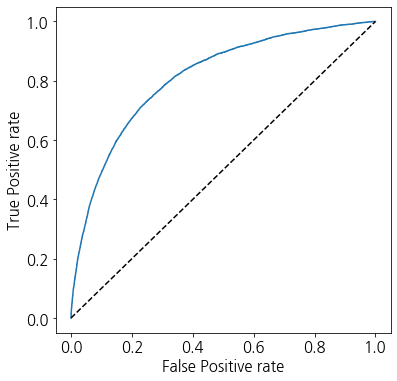

In [507]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(fprs,tprs,label='ROC')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [508]:
print('the Area under the ROC curve is {}'.format(round(metrics.roc_auc_score(val.is_reordered_y,prob_val[:,1]),5)))

the Area under the ROC curve is 0.81205


In [1555]:
val_x_current2 = train_x_current2.merge(val_cstno, on='cstno', how='inner')
val_x_current2.cstno.nunique()

1758

- Sample 예제 : cstno 136554

In [510]:
val_x_current2.loc[val_x_current2.cstno == '136554']

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id,new_pd_index
0,3125992,136554,46,4,9,5.0,2,0,목,21709,17
1,3125992,136554,46,4,9,5.0,1,1,목,11520,2
2,3125992,136554,46,4,9,5.0,8,1,목,41950,64
3,3125992,136554,46,4,9,5.0,10,1,목,30391,43
4,3125992,136554,46,4,9,5.0,11,1,목,4920,86
5,3125992,136554,46,4,9,5.0,9,1,목,47209,81
6,3125992,136554,46,4,9,5.0,14,1,목,21137,15


In [511]:
val.loc[(val.cstno == '136554') & (val.pred_reordered==1),["cstno","order_id_y","product_id",'new_pd_index']].drop_duplicates()

,cstno,order_id_y,product_id,new_pd_index
8940,136554,3125992,43122,68
8942,136554,3125992,11520,2
8943,136554,3125992,8174,94
8957,136554,3125992,30391,43
8958,136554,3125992,4920,86
8963,136554,3125992,39275,57
8964,136554,3125992,45007,74
8966,136554,3125992,27966,37
8969,136554,3125992,47209,81
8971,136554,3125992,21137,15


In [1174]:
val_results = val.loc[(val.pred_reordered==1),['cstno','order_id_y','product_id','pred_reordered']].drop_duplicates()
val_results['new_pd_index'] = le.fit_transform(val_results['product_id']) + 1 

In [1175]:
val_results.head()

,cstno,order_id_y,product_id,pred_reordered,new_pd_index
4,163860,1842541,24838,1,25
8,163860,1842541,49235,1,87
9,163860,1842541,45066,1,75
11,163860,1842541,27845,1,36
12,163860,1842541,13176,1,4


- 고객별 전체 구매 개수

In [513]:
val_x_current2.groupby('cstno').agg({'product_id':'count'})

,product_id
cstno,
10000,1
100001,9
100108,3
100173,4
100198,13
...,...
99259,2
99500,6
99570,1


- 고객별 재구매 개수

In [514]:
val_x_current2[val_x_current2.is_reordered=='1'].groupby('cstno').agg({'product_id':'count'})

,product_id
cstno,
10000,1
100001,9
100108,3
100173,4
100198,13
...,...
99259,2
99500,5
99570,1


- 고객별 재구매 예측 개수

In [515]:
val_results.groupby('cstno').agg({'product_id':'count'})

,product_id
cstno,
10000,12
100001,18
100108,6
100173,7
100198,11
...,...
99259,4
99500,4
99570,2


: F1 maximization을 통해 얻은 threshold를 통해 Validation data에 대해 상품 구매에 대한 예측을 했을 때, 예측된 상품의 개수가 실제 구매 상품의 개수와 일치하지 않았습니다.  
따라서, 현재 구매 정보를 활용하여 예측 확률이 높은 순서대로 cstno마다 threshold를 정하는 방법을 생각하였습니다.

#### **2.7 New prediction<a class='anchor' id="s5">**

지금까지 예측 결과는 기존에 구매한 상품 대상, 고객이 새로운 상품도 구매할 수 있기 때문에 New prediction도 고려할 필요가 있었고 다음 절에서 New prediction을 진행하였습니다.

- 고객들의 과거 구매 이력을 통해 새로운 상품 파악

In [1086]:
past_data2 = past_data.loc[past_data.set =='Train']

In [1087]:
past_data2 = past_data2.merge(products_info[['product_id', 'name']], on = 'product_id', how = 'left')

In [1088]:
past_data2['order_id_n'] = past_data2['order_id'].astype('int') 
past_data2 = past_data2.sort_values(by =['order_id_n', 'new_add'], ascending = True) 

In [1089]:
le = LabelEncoder() 
past_data2['new_id_index'] = le.fit_transform(past_data2['order_id_n']) + 1 
past_data2.loc[past_data2.is_reordered==0,["new_reordered"]] = -1 
past_data2.loc[past_data2.is_reordered==1,["new_reordered"]] = 1 

In [1090]:
past_data3 = past_data2.merge(CA_data_3[['cstno','Seg']].drop_duplicates(),on='cstno',how='left')

In [1091]:
past_data3['new_pd_index'] = le.fit_transform(past_data3['product_id']) + 1 

In [1092]:
past_data3['new_reordered'] = past_data3['new_reordered'].astype('int32') 
past_data3['pd*reordered'] = past_data3['new_reordered']*past_data3['new_pd_index'] 

- 구매 정보에 관한 Matrix  
New prediction은 전체 구매 케이스의 정보를 활용했습니다. 주문번호별 각 상품의 재구매 여부와 장바구니 담은 순서의 정보를 각각의 Matrix로 만들었습니다.  

    - x = 주문번호 * 재구매여부(1 : 재구매, -1 : new )  
    - y = 주문번호 * 장바구니순서(1\~최대갯수)   
    - z = 주문번호 * 상품명 (1~100)  
    - zn = 주문번호 * 상품명(raw)  
    - xz = 주문번호 * (상품*재구매여부)

In [1093]:
x = past_data3.pivot('new_id_index', 'new_add', 'new_reordered').fillna(0).astype('int')
y = past_data3.pivot('new_id_index', 'new_add', 'new_add').fillna(0).astype('int')
z = past_data3.pivot('new_id_index', 'new_add', 'new_pd_index').fillna(0).astype('int')
zn = past_data3.pivot('new_id_index', 'new_add', 'name').fillna(0)
xz = past_data3.pivot('new_id_index', 'new_add', 'pd*reordered').fillna(0).astype('int')

- 구매 정보를 시각화하는 3차원 그래프  
그래프-1(재구매여부, 구매순서, 상품명), 그래프-2(주문번호, 구매순서, 재구매여부)로 재구매 여부를 잘  확인할 수 있도록 나타냈습니다.  
(용량을 고려하여 5주문만 표현했습니다.)  


In [ ]:
fig = plt.figure(figsize = (25,12))
ax = fig.add_subplot(1,2,1,projection= '3d')

for i in range(5) :
    x1 = np.array(x)[i]
    y1 = np.array(y)[i]
    z1 = np.array(z)[i]
    labelz = np.array(zn)[i]  
    
    kk = np.where(x1 ==0)[0][0]
    
    ax.plot(x1[:kk],y1[:kk],z1[:kk])    
    
    for j in range(kk) :
        ax.scatter(x1[j],y1[j],z1[j], marker ='o', color = 'black')
        ax.text(x1[j],y1[j],z1[j], '%s' % (labelz[j]))

ax.set_xlim(-1.2,1.2)
ax.set_xticks([-1,1])
ax.set_zticks([1,100])
ax.set_xlabel('is_reordered')
ax.set_ylabel('add_num')
ax.set_zlabel('product')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax = fig.add_subplot(1,2,2,projection= '3d')
for i in range(5) :
    # x1 = np.array(x)[i]
    x1 = (np.ones(26).astype('int'))*i
    y1 = np.array(y)[i]
    z1 = np.array(x)[i]*-1
    labelz = np.array(zn)[i]  
    
    kk = np.where(y1 ==0)[0][0]
    
    ax.plot(x1[:kk],y1[:kk],z1[:kk])    
    
    for j in range(kk) :
        ax.scatter(x1[j],y1[j],z1[j], marker ='o', color = 'black')
        if z1[j] == 1 :
            ax.text(x1[j],y1[j],z1[j], '%s' % (labelz[j]))            


ax.set_xticks([0,1,2,3,4])
ax.set_zticks([-1,1])
ax.set_xlabel('new_id_index')
ax.set_ylabel('add_num')
ax.set_zlabel('is_reordered')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()

: 오른쪽 그래프의 형식으로 재구매품목을 포함하는 모든구매 중 새로운 구매로 산 상품을 추출할 시, 동일 패턴이 없는 경우 예측이 어렵습니다.  
따라서, 재구매 예측 품목(new_list)을 포함하는 주문에서 가장 많이 판매된 상품(구매 경험 제외)을 찾기 위해 New prediction을 진행하였습니다.

In [516]:
purchase_val = val_x_current2[val_x_current2.is_reordered=='1'].groupby('cstno').agg({'product_id':'count'})
purchase_val.columns=['rank']
purchase_val['check'] = 1

In [517]:
purchase_val.head()

,rank,check
cstno,,
10000,1,1
100001,9,1
100108,3,1
100173,4,1
100198,13,1


In [958]:
val["prob_val"] = prob_val[:,1]
val_sort = val.sort_values(["cstno",'prob_val'],ascending=[True,False])
val_summary = val_sort[["cstno","product_id",'new_pd_index',"prob_val"]]
val_summary["rank"] = val_sort[["cstno","product_id",'new_pd_index',"prob_val"]].groupby(['cstno'])['prob_val'].rank('dense',ascending=False)
val_summary2 = val_summary.merge(purchase_val,how='left',on=['cstno']).query('rank_x<=rank_y')
val_summary2 = val_summary2.fillna(0)
val_f_result = val_summary2.loc[val_summary2.check==1]
val_f_result.groupby('cstno').agg({'product_id':'count'})
val_f_result

,cstno,product_id,new_pd_index,prob_val,rank_x,rank_y,check
0,10000,24852,26,0.596783,1.0,1.0,1.0
44,100001,13176,4,0.625058,1.0,9.0,1.0
45,100001,27966,37,0.588823,2.0,9.0,1.0
46,100001,21137,15,0.580088,3.0,9.0,1.0
47,100001,41220,62,0.564297,4.0,9.0,1.0
...,...,...,...,...,...,...,...
51578,99583,5876,92,0.452157,2.0,4.0,1.0
51579,99583,8174,94,0.410302,3.0,4.0,1.0
51580,99583,8424,96,0.395957,4.0,4.0,1.0
51604,99608,24852,26,0.509347,1.0,2.0,1.0


- 현재 재구매할 것으로 예측한 상품 리스트

In [1193]:
val_result_t = pd.DataFrame(val_results.groupby('cstno')['new_pd_index'].apply(list))

In [1195]:
val_result_t

,new_pd_index
cstno,
10000,"[84, 2, 34, 1, 54, 20, 89, 41, 87, 18, 15, 26]"
100001,"[62, 58, 48, 19, 54, 59, 50, 64, 97, 72, 32, 6..."
100108,"[2, 54, 10, 81, 18, 4]"
100173,"[6, 96, 10, 61, 82, 83, 15]"
100198,"[19, 59, 79, 72, 31, 32, 55, 75, 43, 83, 4]"
...,...
99259,"[2, 75, 22, 4]"
99500,"[17, 34, 73, 4]"
99570,"[37, 29]"


- 현재 재구매할 것으로 예측한 상품 리스트

In [1182]:
val_f_result2 = pd.DataFrame(val_f_result.groupby('cstno')['new_pd_index'].apply(list))
val_f_result2 = val_f_result2.merge(val_f_result[['cstno','rank_y']].drop_duplicates(),on='cstno', how='left')

In [1183]:
val_f_result2

,cstno,new_pd_index,rank_y
0,10000,[26],1.0
1,100001,"[4, 37, 15, 62, 48, 59, 54, 58, 19]",9.0
2,100108,"[4, 54, 81]",3.0
3,100173,"[83, 15, 96, 10]",4.0
4,100198,"[75, 43, 4, 31, 55, 19, 79, 59, 72, 83, 32, 15...",13.0
...,...,...,...
1727,99259,"[75, 22]",2.0
1728,99500,"[73, 17, 34, 4, 48]",5.0
1729,99570,[37],1.0
1730,99583,"[4, 92, 94, 96]",4.0


: 총 1,732명의 예측 결과가 포함되어 있으며, 과거 구매 이력이 없는 상품을 구입한 고객은 26명입니다.

- 지금까지 구매한 상품 리스트

In [1184]:
val_x["new_pd_index"] = val_x.index.get_level_values(2)

In [1185]:
val_output = pd.DataFrame(val_x.groupby('cstno')['new_pd_index'].apply(list))
val_output2 = val_output.merge(val_f_result2,on='cstno',how='left')
val_output2.columns = ['cstno','past_list','new_list','new_pd_cnt']

In [1188]:
val_output2.new_pd_cnt.isna().sum()

26

In [1189]:
val_output2.new_pd_cnt.fillna(0,inplace=True)
val_output2.new_pd_cnt = val_output2.new_pd_cnt.astype(int)

In [1190]:
val_output2.head()

,cstno,past_list,new_list,new_pd_cnt
0,10000,"[47, 62, 65, 56, 6, 84, 68, 33, 78, 5, 9, 42, ...",[26],1
1,100001,"[93, 62, 58, 5, 9, 13, 94, 48, 40, 85, 77, 52,...","[4, 37, 15, 62, 48, 59, 54, 58, 19]",9
2,100108,"[68, 2, 71, 21, 85, 24, 54, 64, 72, 32, 10, 66...","[4, 54, 81]",3
3,100173,"[6, 33, 5, 96, 53, 21, 60, 77, 19, 97, 44, 76,...","[83, 15, 96, 10]",4
4,100198,"[47, 62, 67, 6, 99, 23, 33, 5, 94, 35, 49, 40,...","[75, 43, 4, 31, 55, 19, 79, 59, 72, 83, 32, 15...",13


In [1199]:
val_output2 = val_output2.merge(val_result_t[['new_pd_index']],left_on='cstno',right_index=True,how='left')

- 고객이 현재 구매한 상품의 개수

In [1788]:
val_x_current2

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id,new_pd_index,order_key
0,3125992,136554,46,4,9,5.0,2,0,목,21709,17,2
1,3125992,136554,46,4,9,5.0,1,1,목,11520,2,1
2,3125992,136554,46,4,9,5.0,8,1,목,41950,64,3
3,3125992,136554,46,4,9,5.0,10,1,목,30391,43,5
4,3125992,136554,46,4,9,5.0,11,1,목,4920,86,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7541,344600,78343,83,0,19,2.0,3,1,일,24852,26,1
7542,1017699,626,95,2,10,5.0,2,1,화,24852,26,1
7543,3300995,101638,76,4,8,3.0,7,1,목,24852,26,1
7544,611621,49240,82,6,14,3.0,8,1,토,24852,26,1


In [1792]:
val_output3 = val_output2.merge(val_x_current2.groupby('cstno').agg({'product_id' : 'count'}),right_index=True, left_on='cstno', how='left')
val_output3 = val_output3.drop('new_pd_index',axis=1)
val_output3.columns =['cstno','past_list','new_list','new_pd_cnt','real_pd_count']
val_output3 = val_output3[['cstno','past_list','new_list','new_pd_cnt','real_pd_count']].reset_index(drop=True)

In [1793]:
val_output3

,cstno,past_list,new_list,new_pd_cnt,real_pd_count
0,10000,"[47, 62, 65, 56, 6, 84, 68, 33, 78, 5, 9, 42, ...",[26],1,1
1,100001,"[93, 62, 58, 5, 9, 13, 94, 48, 40, 85, 77, 52,...","[4, 37, 15, 62, 48, 59, 54, 58, 19]",9,9
2,100108,"[68, 2, 71, 21, 85, 24, 54, 64, 72, 32, 10, 66...","[4, 54, 81]",3,3
3,100173,"[6, 33, 5, 96, 53, 21, 60, 77, 19, 97, 44, 76,...","[83, 15, 96, 10]",4,4
4,100198,"[47, 62, 67, 6, 99, 23, 33, 5, 94, 35, 49, 40,...","[75, 43, 4, 31, 55, 19, 79, 59, 72, 83, 32, 15...",13,13
...,...,...,...,...,...
1753,99259,"[6, 58, 2, 48, 35, 25, 54, 50, 30, 72, 46, 8, ...","[75, 22]",2,2
1754,99500,"[17, 58, 34, 94, 48, 53, 91, 25, 20, 44, 55, 7...","[73, 17, 34, 4, 48]",5,6
1755,99570,"[47, 6, 5, 42, 71, 40, 45, 89, 30, 97, 79, 72,...",[37],1,1
1756,99583,"[6, 68, 96, 94, 35, 91, 45, 85, 12, 50, 72, 32...","[4, 92, 94, 96]",4,4


: 재구매를 했지만 예측 추정치가 낮아 뽑히지 않은 상품들의 경우 전체 예측(new_list_t)가 비어있기 때문에 new_list로 대체(재구매 하였지만, 예측이 낮은 경우)합니다. 
가장 많은 구매 패턴을 찾기 위해 재구매한 상품 list를 담을 new_list_reordered_x 와 새로운구매 상품 list를 담을 new_list_reordered_xt 컬럼을 생성합니다. 

In [1795]:
val_output3['new_list_reordered_x'] = ""

구매 빈도가 높은 상품군을 추출하기 위한 함수를 아래와 같이 작성했습니다. 
재구매 예측 리스트를 포함하는 구매 케이스를 뽑고, 해당 고객이 구매 경험이 없는 상품들 중 가장 높은 판매를 보인 상품 리스트를 작성합니다. 

In [1796]:
def new_product (data) :     
    base_tmp = np.array(data) 
  
    for i in range(len(data)) :
        
        new_list = base_tmp[i][2]
        past_list = base_tmp[i][1]
        new_pd_cnt = base_tmp[i][3]
        new_cnt = base_tmp[i][4] - new_pd_cnt

        
        if new_pd_cnt == 0 :
            z_true = []
        else :
            z_true = z.isin(new_list)

        if new_pd_cnt == 0 :
            true = z.index
        elif pd.DataFrame(z_true).sum(axis=1).max() >= (new_pd_cnt) : 
            true = z.loc[pd.DataFrame(z_true).sum(axis=1) >= (new_pd_cnt)].index 
        elif pd.DataFrame(z_true).sum(axis=1).max() >= (new_pd_cnt/1.5) : 
            true = z.loc[pd.DataFrame(z_true).sum(axis=1) >= (new_pd_cnt/1.5)].index 
        elif  pd.DataFrame(z_true).sum(axis=1).max() >= (new_pd_cnt/2) : 
            true = z.loc[pd.DataFrame(z_true).sum(axis=1) >= (new_pd_cnt/2)].index 
        else :
            true = z.loc[pd.DataFrame(z_true).sum(axis=1) >= (new_pd_cnt/3)].index 
        tmp_db = z.iloc[true-1] 
        
        pre = list(tmp_db.values[tmp_db.values!=0]) 
        tmp = pd.DataFrame(pd.DataFrame([x for x in pre if x not in past_list], columns = ['product']).value_counts()).reset_index()
        d = tmp['product'].head(new_cnt) 
        data['new_list_reordered_x'][i] = list(d)        
        
    return data 
 
 

In [1797]:
%%time
new_product(val_output3)

KeyboardInterrupt: 

In [1561]:
tt = val_output3.loc[val_output3['new_pd_cnt'] < val_output3['real_pd_count'],['cstno','new_list','new_list_reordered_x']]

In [1562]:
tt

,cstno,new_list,new_list_reordered_x
5,100247,[26],[39]
13,100811,"[55, 60]",[81]
15,101076,"[4, 37, 10]",[18]
19,101547,"[23, 83]",[18]
29,103100,"[75, 26, 93, 100, 56]","[87, 70]"
...,...,...,...
1744,98204,"[26, 2, 57]",[18]
1746,98601,"[26, 36, 54, 55, 18, 83, 17, 82]",[20]
1747,98641,"[83, 69]","[26, 7]"
1749,98891,"[28, 24, 18, 44, 85, 51]",[74]


In [1389]:
res_tt = tt['new_list'] + tt['new_list_reordered_x']

In [1393]:
val_output3.loc[val_output3['new_pd_cnt'] < val_output3['real_pd_count']].new_list = res_tt

##### **- Order number**

In [1507]:
val_f_result2 = val_f_result.merge(past_data.groupby(['cstno','product_id']).agg({'new_add':'mean'}),on=['cstno','product_id'],how='left')
val_f_result2

In [1609]:
val_f_result2['new_add_order'] = val_f_result2[["cstno","new_add"]].groupby(['cstno'])['new_add'].rank('dense',ascending=True).astype(int)
val_x_current2_1 = val_x_current2[val_x_current2.is_reordered=='1']
val_x_current2_1['new_add'] = val_x_current2_1.sort_values('add_order', ascending = True).groupby(['cstno','order_number']).cumcount() +1 
val_x_current3 = val_x_current2_1.merge(val_f_result2[['cstno','product_id','new_pd_index','new_add_order']], left_on =['cstno','new_add'], right_on = ['cstno','new_add_order'], how='left')

In [1610]:
val_x_current3

In [1572]:
val_x_current2_2 = val_x_current2[val_x_current2.is_reordered=='0']
val_x_current2_2

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id,new_pd_index
0,3125992,136554,46,4,9,5.0,2,0,목,21709,17
13,1732236,182942,49,0,15,21.0,10,0,일,39928,60
15,1732236,182942,49,0,15,21.0,14,0,일,24964,27
17,169691,99500,50,1,10,10.0,32,0,월,33000,47
130,3370469,166508,55,0,12,5.0,4,0,일,20114,13
...,...,...,...,...,...,...,...,...,...,...,...
7348,3331744,60569,77,5,11,7.0,6,0,금,27845,36
7355,41909,148024,100,6,8,2.0,1,0,토,27845,36
7408,3234870,108539,53,0,9,4.0,2,0,일,47766,83
7422,2689812,187716,82,5,12,4.0,3,0,금,47766,83


In [1574]:
ttt = tt[['cstno','new_list_reordered_x']]
tttt = ttt.explode('new_list_reordered_x')
val_x_current2.groupby('new_pd_index').agg({'add_order':'mean'})
res_new = tttt.merge(val_x_current2.groupby('new_pd_index').agg({'add_order':'mean'}),left_on = 'new_list_reordered_x', right_index=True, how='left')
res_new.fillna(0,inplace=True)

In [1677]:
res_new['k']=  res_new.sort_values('cstno', ascending = True).groupby(['cstno']).cumcount() +1 

In [1678]:
res_new

,cstno,new_list_reordered_x,add_order,k
5,100247,39,7.913043,1
13,100811,81,7.061135,1
15,101076,18,9.459330,1
19,101547,18,9.459330,1
29,103100,87,6.853333,1
...,...,...,...,...
1746,98601,20,10.891892,1
1747,98641,26,4.473430,1
1747,98641,7,8.478261,2
1749,98891,74,9.936937,1


In [1813]:
res_new = res_new[res_new.k==1]

In [1814]:
res_new

,cstno,new_list_reordered_x,add_order,k,product_id,new_pd_index
0,100247,39,7.913043,1,28204,39.0
1,100811,81,7.061135,1,47209,81.0
2,101076,18,9.459330,1,21903,18.0
3,101547,18,9.459330,1,21903,18.0
4,103100,87,6.853333,1,49235,87.0
...,...,...,...,...,...,...
433,98204,18,9.459330,1,21903,18.0
434,98601,20,10.891892,1,22035,20.0
435,98641,26,4.473430,1,24852,26.0
437,98891,74,9.936937,1,45007,74.0


In [1823]:
output1 = val_x_current2.merge(val_x_current3[['cstno','order_id','new_add','product_id_y','is_reordered']],left_on=['cstno','order_id','order_key','is_reordered'],
                     right_on=['cstno','order_id','new_add','is_reordered'],how='left')

In [1824]:
output1

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id,new_pd_index,order_key,new_add,product_id_y
0,3125992,136554,46,4,9,5.0,2,0,목,21709,17,2,NaN,NaN
1,3125992,136554,46,4,9,5.0,1,1,목,11520,2,1,1.0,24852
2,3125992,136554,46,4,9,5.0,8,1,목,41950,64,3,3.0,47209
3,3125992,136554,46,4,9,5.0,10,1,목,30391,43,5,5.0,11520
4,3125992,136554,46,4,9,5.0,11,1,목,4920,86,6,6.0,45007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,344600,78343,83,0,19,2.0,3,1,일,24852,26,1,1.0,24852
7652,1017699,626,95,2,10,5.0,2,1,화,24852,26,1,1.0,24852
7653,3300995,101638,76,4,8,3.0,7,1,목,24852,26,1,1.0,24852
7654,611621,49240,82,6,14,3.0,8,1,토,24852,26,1,1.0,24852


In [1825]:
res_new[['cstno','product_id']]

,cstno,product_id
0,100247,28204
1,100811,47209
2,101076,21903
3,101547,21903
4,103100,49235
...,...,...
433,98204,21903
434,98601,22035
435,98641,24852
437,98891,45007


In [1837]:
output1[output1.product_id_y.isna()].merge(res_new[['cstno','product_id']],on='cstno',how='left')

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,product_id_x,new_pd_index,order_key,new_add,product_id_y,product_id_y
0,3125992,136554,46.0,4.0,9.0,5.0,2.0,0,목,NaN,17.0,2.0,NaN,NaN,NaN
1,3370469,166508,55.0,0.0,12.0,5.0,4.0,0,일,NaN,13.0,3.0,NaN,NaN,49683
2,2420089,36663,75.0,0.0,22.0,9.0,15.0,0,일,NaN,17.0,7.0,NaN,NaN,35221
3,2181320,98601,100.0,1.0,11.0,4.0,22.0,0,월,NaN,70.0,9.0,NaN,NaN,22035
4,2426085,67438,44.0,1.0,6.0,4.0,28.0,1,월,NaN,83.0,11.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3. Test model<a class='anchor' id="Model">**

> Test data에 대하여 최종 결과를 산출하였습니다.

In [1762]:
te_results = te.loc[(te.pred_reordered==1),['cstno','order_id_y','product_id','pred_reordered']].drop_duplicates()
te_results['new_pd_index'] = le.fit_transform(te_results['product_id']) + 1 

In [1750]:
purchase_te = test_x_current[test_x_current.is_reordered=='1'].groupby('cstno').agg({'order_number':'count'}) 
purchase_te.columns=['rank'] 
purchase_te['check'] = 1 

In [1751]:
prob_te = vot.predict_proba(te_x.drop('order_id_y',axis=1))  
 
te["pred_reordered"] =  (prob_te[:,1]>=res.loc[res['F1_val']==res['F1_val'].max(),"threshold"].values[0]) 
te["pred_reordered"] = te.pred_reordered.apply(int) 

In [1752]:
te["prob_te"] = prob_te[:,1] 
te_sort = te.sort_values(["cstno",'prob_te'],ascending=[True,False]) 
te_summary = te_sort[["cstno","product_id",'new_pd_index',"prob_te"]] 
te_summary["rank"] = te_sort[["cstno","product_id",'new_pd_index',"prob_te"]].groupby(['cstno'])['prob_te'].rank('dense',ascending=False) 
te_summary2 = te_summary.merge(purchase_te,how='left',on=['cstno']).query('rank_x<=rank_y') 
te_summary2 = te_summary2.fillna(0) 
te_f_result = te_summary2.loc[te_summary2.check==1] 
te_f_result.groupby('cstno').agg({'product_id':'count'}) 
te_f_result 

,cstno,product_id,new_pd_index,prob_te,rank_x,rank_y,check
0,100041,13176,4,0.538635,1.0,5.0,1.0
1,100041,44632,73,0.442352,2.0,5.0,1.0
2,100041,27521,35,0.357085,3.0,5.0,1.0
3,100041,47209,81,0.352473,4.0,5.0,1.0
4,100041,47626,82,0.342888,5.0,5.0,1.0
...,...,...,...,...,...,...,...
98178,99990,45066,75,0.416323,1.0,5.0,1.0
98179,99990,26209,29,0.408374,2.0,5.0,1.0
98180,99990,41950,64,0.406131,3.0,5.0,1.0
98181,99990,31717,46,0.295507,4.0,5.0,1.0


In [1763]:
te_result_t = pd.DataFrame(te_results.groupby('cstno')['new_pd_index'].apply(list))

In [1765]:
te_f_result2 = pd.DataFrame(te_f_result.groupby('cstno')['new_pd_index'].apply(list)) 
te_f_result2 = te_f_result2.merge(te_f_result[['cstno','rank_y']].drop_duplicates(),on='cstno', how='left')

In [1766]:
te_f_result2

,cstno,new_pd_index,rank_y
0,100041,"[4, 73, 35, 81, 82]",5.0
1,100103,"[81, 4, 64, 60, 1, 68, 59, 18, 30]",9.0
2,100165,"[23, 63, 79, 84]",4.0
3,100270,"[7, 98]",2.0
4,100359,[26],1.0
...,...,...,...
4054,99897,"[17, 53, 83]",3.0
4055,999,"[26, 9, 63, 5, 4, 7, 91, 34]",8.0
4056,99915,"[15, 56, 26, 53, 96, 76, 28, 24, 98]",9.0
4057,99963,"[4, 86, 7, 74]",4.0


In [ ]:
val_output = pd.DataFrame(val_x.groupby('cstno')['new_pd_index'].apply(list))


In [1767]:
te_x["new_pd_index"] = te_x.index.get_level_values(2) 
te_output = pd.DataFrame(te_x.groupby('cstno')['new_pd_index'].apply(list)) 

In [1772]:
te_output2 = te_output.merge(te_f_result2,on='cstno',how='left')
te_output2

,cstno,new_pd_index_x,new_pd_index_y,rank_y
0,100041,"[93, 63, 51, 33, 78, 35, 49, 45, 69, 20, 30, 3...","[4, 73, 35, 81, 82]",5.0
1,100103,"[68, 78, 60, 85, 1, 54, 59, 30, 64, 10, 57, 74...","[81, 4, 64, 60, 1, 68, 59, 18, 30]",9.0
2,100165,"[17, 63, 56, 84, 23, 42, 49, 40, 24, 98, 69, 5...","[23, 63, 79, 84]",4.0
3,100270,"[38, 98, 37, 7, 26]","[7, 98]",2.0
4,100359,"[47, 62, 63, 67, 6, 51, 23, 78, 60, 45, 28, 98...",[26],1.0
...,...,...,...,...
4136,99897,"[17, 38, 13, 53, 85, 77, 19, 50, 64, 97, 72, 4...","[17, 53, 83]",3.0
4137,999,"[93, 63, 58, 33, 78, 5, 38, 9, 2, 34, 94, 91, ...","[26, 9, 63, 5, 4, 7, 91, 34]",8.0
4138,99915,"[56, 67, 84, 33, 78, 96, 13, 71, 49, 53, 90, 4...","[15, 56, 26, 53, 96, 76, 28, 24, 98]",9.0
4139,99963,"[5, 42, 96, 13, 77, 52, 24, 98, 50, 64, 97, 79...","[4, 86, 7, 74]",4.0


In [1773]:
te_output2.columns = ['cstno','past_list','new_list','new_pd_cnt']

In [1776]:
te_output3 = te_output2.merge(test_x_current.groupby('cstno').agg({'order_number' : 'count'}),right_index=True, left_on='cstno', how='left')

In [1777]:
te_output3

,cstno,past_list,new_list,new_pd_cnt,order_number
0,100041,"[93, 63, 51, 33, 78, 35, 49, 45, 69, 20, 30, 3...","[4, 73, 35, 81, 82]",5.0,5
1,100103,"[68, 78, 60, 85, 1, 54, 59, 30, 64, 10, 57, 74...","[81, 4, 64, 60, 1, 68, 59, 18, 30]",9.0,9
2,100165,"[17, 63, 56, 84, 23, 42, 49, 40, 24, 98, 69, 5...","[23, 63, 79, 84]",4.0,4
3,100270,"[38, 98, 37, 7, 26]","[7, 98]",2.0,2
4,100359,"[47, 62, 63, 67, 6, 51, 23, 78, 60, 45, 28, 98...",[26],1.0,2
...,...,...,...,...,...
4136,99897,"[17, 38, 13, 53, 85, 77, 19, 50, 64, 97, 72, 4...","[17, 53, 83]",3.0,4
4137,999,"[93, 63, 58, 33, 78, 5, 38, 9, 2, 34, 94, 91, ...","[26, 9, 63, 5, 4, 7, 91, 34]",8.0,8
4138,99915,"[56, 67, 84, 33, 78, 96, 13, 71, 49, 53, 90, 4...","[15, 56, 26, 53, 96, 76, 28, 24, 98]",9.0,10
4139,99963,"[5, 42, 96, 13, 77, 52, 24, 98, 50, 64, 97, 79...","[4, 86, 7, 74]",4.0,4


In [1779]:
te_output3.columns =['cstno','past_list','new_list','new_pd_cnt','real_pd_count']

In [1801]:
te_output3 = te_output3[['cstno','past_list','new_list','new_pd_cnt','real_pd_count']].reset_index(drop=True)

In [1808]:
te_output3.new_pd_cnt.fillna(0,inplace=True)

In [1811]:
te_output3['new_pd_cnt'] = te_output3.new_pd_cnt.astype(int)
te_output3['new_list_reordered_x'] = ""

In [1812]:
%%time
new_product(te_output3)

CPU times: user 15min 58s, sys: 15.9 s, total: 16min 14s
Wall time: 16min 13s


,cstno,past_list,new_list,new_pd_cnt,real_pd_count,new_list_reordered_x
0,100041,"[93, 63, 51, 33, 78, 35, 49, 45, 69, 20, 30, 3...","[4, 73, 35, 81, 82]",5,5,[]
1,100103,"[68, 78, 60, 85, 1, 54, 59, 30, 64, 10, 57, 74...","[81, 4, 64, 60, 1, 68, 59, 18, 30]",9,9,[]
2,100165,"[17, 63, 56, 84, 23, 42, 49, 40, 24, 98, 69, 5...","[23, 63, 79, 84]",4,4,[]
3,100270,"[38, 98, 37, 7, 26]","[7, 98]",2,2,[]
4,100359,"[47, 62, 63, 67, 6, 51, 23, 78, 60, 45, 28, 98...",[26],1,2,[36]
...,...,...,...,...,...,...
4136,99897,"[17, 38, 13, 53, 85, 77, 19, 50, 64, 97, 72, 4...","[17, 53, 83]",3,4,[26]
4137,999,"[93, 63, 58, 33, 78, 5, 38, 9, 2, 34, 94, 91, ...","[26, 9, 63, 5, 4, 7, 91, 34]",8,8,[]
4138,99915,"[56, 67, 84, 33, 78, 96, 13, 71, 49, 53, 90, 4...","[15, 56, 26, 53, 96, 76, 28, 24, 98]",9,10,[75]
4139,99963,"[5, 42, 96, 13, 77, 52, 24, 98, 50, 64, 97, 79...","[4, 86, 7, 74]",4,4,[]


In [1838]:
te_output3

,cstno,past_list,new_list,new_pd_cnt,real_pd_count,new_list_reordered_x
0,100041,"[93, 63, 51, 33, 78, 35, 49, 45, 69, 20, 30, 3...","[4, 73, 35, 81, 82]",5,5,[]
1,100103,"[68, 78, 60, 85, 1, 54, 59, 30, 64, 10, 57, 74...","[81, 4, 64, 60, 1, 68, 59, 18, 30]",9,9,[]
2,100165,"[17, 63, 56, 84, 23, 42, 49, 40, 24, 98, 69, 5...","[23, 63, 79, 84]",4,4,[]
3,100270,"[38, 98, 37, 7, 26]","[7, 98]",2,2,[]
4,100359,"[47, 62, 63, 67, 6, 51, 23, 78, 60, 45, 28, 98...",[26],1,2,[36]
...,...,...,...,...,...,...
4136,99897,"[17, 38, 13, 53, 85, 77, 19, 50, 64, 97, 72, 4...","[17, 53, 83]",3,4,[26]
4137,999,"[93, 63, 58, 33, 78, 5, 38, 9, 2, 34, 94, 91, ...","[26, 9, 63, 5, 4, 7, 91, 34]",8,8,[]
4138,99915,"[56, 67, 84, 33, 78, 96, 13, 71, 49, 53, 90, 4...","[15, 56, 26, 53, 96, 76, 28, 24, 98]",9,10,[75]
4139,99963,"[5, 42, 96, 13, 77, 52, 24, 98, 50, 64, 97, 79...","[4, 86, 7, 74]",4,4,[]


In [1839]:
te_f_result2 = te_f_result.merge(past_data.groupby(['cstno','product_id']).agg({'new_add':'mean'}),on=['cstno','product_id'],how='left')
te_f_result2

,cstno,product_id,new_pd_index,prob_te,rank_x,rank_y,check,new_add
0,100041,13176,4,0.538635,1.0,5.0,1.0,3.052632
1,100041,44632,73,0.442352,2.0,5.0,1.0,3.133333
2,100041,27521,35,0.357085,3.0,5.0,1.0,2.000000
3,100041,47209,81,0.352473,4.0,5.0,1.0,2.000000
4,100041,47626,82,0.342888,5.0,5.0,1.0,3.333333
...,...,...,...,...,...,...,...,...
14652,99990,45066,75,0.416323,1.0,5.0,1.0,2.642857
14653,99990,26209,29,0.408374,2.0,5.0,1.0,2.428571
14654,99990,41950,64,0.406131,3.0,5.0,1.0,3.062500
14655,99990,31717,46,0.295507,4.0,5.0,1.0,1.928571


In [1842]:
te_f_result2

,cstno,product_id,new_pd_index,prob_te,rank_x,rank_y,check,new_add,new_add_order
0,100041,13176,4,0.538635,1.0,5.0,1.0,3.052632,2
1,100041,44632,73,0.442352,2.0,5.0,1.0,3.133333,3
2,100041,27521,35,0.357085,3.0,5.0,1.0,2.000000,1
3,100041,47209,81,0.352473,4.0,5.0,1.0,2.000000,1
4,100041,47626,82,0.342888,5.0,5.0,1.0,3.333333,4
...,...,...,...,...,...,...,...,...,...
14652,99990,45066,75,0.416323,1.0,5.0,1.0,2.642857,3
14653,99990,26209,29,0.408374,2.0,5.0,1.0,2.428571,2
14654,99990,41950,64,0.406131,3.0,5.0,1.0,3.062500,4
14655,99990,31717,46,0.295507,4.0,5.0,1.0,1.928571,1


In [1844]:
test_x_current

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day
0,3384204,37987,38,5,16,13.0,9,1,금
1,2578612,169022,38,6,10,7.0,4,1,토
2,188887,200090,45,5,16,30.0,5,1,금
3,646772,149416,39,1,13,13.0,15,1,월
4,300214,113836,42,3,10,17.0,1,1,수
...,...,...,...,...,...,...,...,...,...
16121,2047884,57077,46,5,15,8.0,2,1,금
16122,567625,83592,43,4,12,0.0,1,1,목
16123,596442,157740,49,6,10,3.0,2,1,토
16124,671102,92043,43,4,10,10.0,1,1,목


In [1845]:
test_x_current['new_add'] = test_x_current.sort_values('add_order', ascending = True).groupby(['cstno','order_number']).cumcount() +1 

In [1846]:
te_f_result2['new_add_order'] = te_f_result2[["cstno","new_add"]].groupby(['cstno'])['new_add'].rank('dense',ascending=True).astype(int)
te_x_current2_1 = test_x_current[test_x_current.is_reordered=='1']
te_x_current2_1['new_add'] = test_x_current.sort_values('add_order', ascending = True).groupby(['cstno','order_number']).cumcount() +1 
test_x_current2 = test_x_current.merge(te_f_result2[['cstno','product_id','new_pd_index','new_add_order']], left_on =['cstno','new_add'], right_on = ['cstno','new_add_order'], how='left')

In [1848]:
test_x_current2_2 = test_x_current2[test_x_current2.is_reordered=='0']
test_x_current2_2

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,new_add,product_id,new_pd_index,new_add_order
5,3038310,82311,41,6,17,2.0,4,0,토,1,4920,86.0,1.0
14,2596889,17854,43,2,14,30.0,27,0,화,5,NaN,NaN,NaN
48,903268,129008,43,5,10,2.0,2,0,금,1,22035,20.0,1.0
50,2062700,157369,39,3,13,4.0,19,0,수,6,NaN,NaN,NaN
53,3411504,100414,63,0,15,4.0,4,0,일,2,11520,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,1184749,182598,40,0,14,21.0,21,0,일,7,NaN,NaN,NaN
16289,2462209,127852,49,5,10,13.0,7,0,금,1,5077,89.0,1.0
16319,1026514,91371,39,5,13,7.0,4,0,금,3,27966,37.0,3.0
16374,2857665,133452,40,0,15,6.0,7,0,일,3,17794,8.0,3.0


In [1849]:
ttt = tt[['cstno','new_list_reordered_x']]
tttt = ttt.explode('new_list_reordered_x')
test_x_current2.groupby('new_pd_index').agg({'add_order':'mean'})
res_new = tttt.merge(test_x_current2.groupby('new_pd_index').agg({'add_order':'mean'}),left_on = 'new_list_reordered_x', right_index=True, how='left')
res_new.fillna(0,inplace=True)

In [1850]:
res_new['k']=  res_new.sort_values('cstno', ascending = True).groupby(['cstno']).cumcount() +1 

In [1852]:
test_x_current

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,new_add
0,3384204,37987,38,5,16,13.0,9,1,금,4
1,2578612,169022,38,6,10,7.0,4,1,토,3
2,188887,200090,45,5,16,30.0,5,1,금,3
3,646772,149416,39,1,13,13.0,15,1,월,8
4,300214,113836,42,3,10,17.0,1,1,수,1
...,...,...,...,...,...,...,...,...,...,...
16121,2047884,57077,46,5,15,8.0,2,1,금,1
16122,567625,83592,43,4,12,0.0,1,1,목,1
16123,596442,157740,49,6,10,3.0,2,1,토,1
16124,671102,92043,43,4,10,10.0,1,1,목,1


In [1853]:
test_x_current2

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,t_week_day,new_add,product_id,new_pd_index,new_add_order
0,3384204,37987,38,5,16,13.0,9,1,금,4,27521,35.0,4.0
1,2578612,169022,38,6,10,7.0,4,1,토,3,35951,54.0,3.0
2,188887,200090,45,5,16,30.0,5,1,금,3,24838,25.0,3.0
3,646772,149416,39,1,13,13.0,15,1,월,8,4920,86.0,8.0
4,300214,113836,42,3,10,17.0,1,1,수,1,47209,81.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16452,2047884,57077,46,5,15,8.0,2,1,금,1,196,11.0,1.0
16453,567625,83592,43,4,12,0.0,1,1,목,1,24852,26.0,1.0
16454,596442,157740,49,6,10,3.0,2,1,토,1,24852,26.0,1.0
16455,671102,92043,43,4,10,10.0,1,1,목,1,24852,26.0,1.0


In [1851]:
test_x_current2.product_id.to_csv(f'./test_y.csv') 

KeyError: "['product_id_y'] not in index"

-------------------------

## Ⅲ. **Results<a class='anchor' id="Results">**

> <span style='font-size:15px ; line-height:2.0'> 
&nbsp;본 과제에서 저희 팀은 고객이 재구매할 만한 상품을 제안해냈습니다.<br> 
<br> 
온라인 커머스 상품의 구매 이력을 토대로 다음 분석 결과를 얻을 수 있었습니다.<br> 
&nbsp;&nbsp;&nbsp;1) Network analysis를 통해 Organic 상품들의 높은 co-purchase 관계를 알 수 있었습니다.<br> 
&nbsp;&nbsp;&nbsp;2) Cluster analysis을 토대로 Organic 상품의 구매가 많은 고객 cluster를 발굴할 수 있었습니다.<br> 
<br> 
온라인 커머스 상품의 구매 이력과 현재 구매 정보를 토대로 ML 예측 모형을 개발했습니다.<br> 
&nbsp;&nbsp;&nbsp;1) 과거 구매 이력 정보를 통해 설명 변수를 생성하고 <br> 
&nbsp;&nbsp;&nbsp;2) Random Forest, XGboost, Gradient Boodst 방법론을 이용하여 Soft voting classifer를 개발했습니다.<br> 
&nbsp;&nbsp;&nbsp;3) F1-score를 최대로 하는 threshold를 계산하였을 때 0.4정도의 F-score를 얻을 수 있었습니다. (AUC=0.8)<br> 
<br> 
하지만, Validation data에 대하여 ML모형의 성능을 검증해본 결과, 실제 구매한 상품의 개수와 예측된 상품의 개수가 다른 경우가 있었습니다.<br> 
그래서 저희팀은 고객의 현재 구매 정보에서 구매한 상품의 개수 정보를 이용하여 높은 예측확률을 보이는 상품들을 선택하였고, 이들과 함께 구매된 새로운 상품을 추정하였습니다.
</span>  